## Decision tree function 
---

In [1]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, adjusted_rand_score

class DecisionTree:
  def __init__(self, max_depth=None, min_samples_split=2, criterion='entropy'):
    self.max_depth = max_depth
    self.min_samples_split = min_samples_split
    self.criterion = criterion
    self.tree = None                                                          # переменная, в которой будет храниться готовое дерево решений.
    self.feature_importances = None                                           # переменная для важности фич


  def entropy(self, y):
    counts = np.bincount(y)                                                   # Считаем количество объектов для каждого класса. Формат - [0,0,1,2,1,2,0]
    probabilities = counts / len(y)                                           # вероятность. Формат - [x/y, x1/y, x3/y]
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])          # суммируем вероятности. p - каждая итерация в полученном массиве 'probabilities'.


  def gini(self, y):
    counts = np.bincount(y)
    probabilities = counts / len(y)
    return 1 - np.sum(probabilities ** 2)


  def information_gain(self, y, left_indices, right_indices):
    if self.criterion == 'entropy':                                            # Выбор критерия
      impurity_func = self.entropy
    else:
      impurity_func = self.gini

    parent_impurity = impurity_func(y)                                         # неопределенность для всей выборки.
    left_impurity = impurity_func(y[left_indices])
    right_impurity = impurity_func(y[right_indices])

    n, n_left, n_right = len(y), len(left_indices), len(right_indices)
    weighted_impurity = (n_left / n) * left_impurity + (n_right / n) * right_impurity

    return parent_impurity - weighted_impurity                                 # возвращаем инф. выиг.


  def custom_1(self, y, left_indices, right_indices):
    N = y_oh.sum()

    left = y_oh[left_indices]
    right = y_oh[right_indices]
    p_1 = left.sum() / N
    p_2 = right.sum() / N
    num_classes = y_oh.shape[1]                                                # .shape[1] кол-во столбцов, .shape[0] - кол-во строк.

    sum_total = 0
    epsilon = 1e-10 
    
    for l in range(num_classes):
      p_1l = left[:, l].sum() / N
      p_2l = right[:, l].sum() / N
      p_l = p_1l + p_2l
      b = 1

      # eps. для стабильности вычислений
      # denominator_1 = max(p_1 * b**2, epsilon)
      # denominator_2 = max(p_2 * b**2, epsilon)
      
      sum_total += ((p_1l - p_1 * p_l)**2) / p_1 * b**2
      sum_total += ((p_2l - p_2 * p_l)**2) / p_2 * b**2

    return N * sum_total


  def custom_2(self, y, left_indices, right_indices):
    N = y_oh.sum()

    left = y_oh[left_indices]
    right = y_oh[right_indices]
    p_1 = left.sum() / N
    p_2 = right.sum() / N
    num_classes = y_oh.shape[1] 

    sum_total = 0
    epsilon = 1e-10 
    
    for l in range(num_classes):
      p_1l = left[:, l].sum() / N
      p_2l = right[:, l].sum() / N
      p_l = p_1l + p_2l
      b = np.sqrt(p_l)

      # eps. для стабильности вычислений
      # denominator_1 = max(p_1 * b**2, epsilon)
      # denominator_2 = max(p_2 * b**2, epsilon)
      
      sum_total += ((p_1l - p_1 * p_l)**2) / p_1 * b**2
      sum_total += ((p_2l - p_2 * p_l)**2) / p_2 * b**2

    return N * sum_total


  def custom_3(self, y, left_indices, right_indices):
    N = y_oh.sum()

    left = y_oh[left_indices]
    right = y_oh[right_indices]
    p_1 = left.sum() / N
    p_2 = right.sum() / N
    num_classes = y_oh.shape[1] 

    sum_total = 0
    epsilon = 1e-10 
    
    for l in range(num_classes):
      p_1l = left[:, l].sum() / N
      p_2l = right[:, l].sum() / N
      p_l = p_1l + p_2l
      b = np.sqrt(p_l*(1 - p_l))
      
      # eps. для стабильности вычислений
      denominator_1 = max(p_1 * b**2, epsilon)
      denominator_2 = max(p_2 * b**2, epsilon)
      
      sum_total += ((p_1l - p_1 * p_l)**2) / denominator_1
      sum_total += ((p_2l - p_2 * p_l)**2) / denominator_2

    return N * sum_total


  def custom_4(self, y, left_indices, right_indices):
    N = y_oh.sum()

    left = y_oh[left_indices]
    right = y_oh[right_indices]
    p_1 = left.sum() / N
    p_2 = right.sum() / N
    num_classes = y_oh.shape[1]

    sum_total = 0
    epsilon = 1e-10 
    
    for l in range(num_classes):
      p_1l = left[:, l].sum() / N
      p_2l = right[:, l].sum() / N
      p_l = p_1l + p_2l
      b = p_l

      # eps. для стабильности вычислений
      # denominator_1 = max(p_1 * b**2, epsilon)
      # denominator_2 = max(p_2 * b**2, epsilon)
      
      sum_total += ((p_1l - p_1 * p_l)**2) / p_1 * b**2
      sum_total += ((p_2l - p_2 * p_l)**2) / p_2 * b**2

    return N * sum_total


  def custom_5(self, y, left_indices, right_indices):
    N = y_oh.sum()

    left = y_oh[left_indices]
    right = y_oh[right_indices]
    p_1 = left.sum() / N
    p_2 = right.sum() / N
    num_classes = y_oh.shape[1]

    sum_total = 0
    epsilon = 1e-10
    
    for l in range(num_classes):
      p_1l = left[:, l].sum() / N
      p_2l = right[:, l].sum() / N
      p_l = p_1l + p_2l
      b = p_l**2

      # eps. для стабильности вычислений
      # denominator_1 = max(p_1 * b**2, epsilon)
      # denominator_2 = max(p_2 * b**2, epsilon)
      
      sum_total += ((p_1l - p_1 * p_l)**2) / p_1 * b**2
      sum_total += ((p_2l - p_2 * p_l)**2) / p_2 * b**2

    return N * sum_total
  
  
  def custom_6(self, y, left_indices, right_indices):
    N = y_oh.sum()

    left = y_oh[left_indices]
    right = y_oh[right_indices]
    p_1 = left.sum() / N
    p_2 = right.sum() / N
    num_classes = y_oh.shape[1]

    sum_total = 0
    epsilon = 1e-10 
    
    for l in range(num_classes):
      p_1l = left[:, l].sum() / N
      p_2l = right[:, l].sum() / N
      p_l = p_1l + p_2l
      b = np.log(max(p_l, epsilon))

      # eps. для стабильности вычислений
      denominator_1 = max(p_1 * b**2, epsilon)
      denominator_2 = max(p_2 * b**2, epsilon)
      
      sum_total += ((p_1l - p_1 * p_l)**2) / denominator_1
      sum_total += ((p_2l - p_2 * p_l)**2) / denominator_2

    return N * sum_total
    
    
  def custom_7(self, y, left_indices, right_indices):
    N = y_oh.sum()

    left = y_oh[left_indices]
    right = y_oh[right_indices]
    p_1 = left.sum() / N
    p_2 = right.sum() / N
    num_classes = y_oh.shape[1]

    sum_total = 0
    epsilon = 1e-10 
    
    for l in range(num_classes):
      p_1l = left[:, l].sum() / N
      p_2l = right[:, l].sum() / N
      p_l = p_1l + p_2l
      
      b = (-p_l)*np.log(max(p_l, epsilon))

      # eps. для стабильности вычислений
      denominator_1 = max(p_1 * b**2, epsilon)
      denominator_2 = max(p_2 * b**2, epsilon)
       
      sum_total += ((p_1l - p_1 * p_l)**2) / denominator_1
      sum_total += ((p_2l - p_2 * p_l)**2) / denominator_2

    return N * sum_total


  # Функция находит наиболее частый элемент в массиве y (метки классов).
  def most_common_label(self, y):
    return Counter(y).most_common(1)[0][0]


  def find_best_split(self, X, y, num_features):
    best_gain = 0                                                      # хранит лучшее значение inf.gain
    best_split = None                                                  # будет содержать параметры наилучшего разбиения

    for feature_index in range(num_features):                          # перебираем по очереди признаки.
      thresholds = np.unique(X[:, feature_index])                      # находим уникальные значения.
      for threshold in thresholds:                                     # для каждого уникального значения делим данные на 2 части.
        left_indices = np.where(X[:, feature_index] <= threshold)[0]   # левый - меньше уникального значения. [0] - нужен для возвращения массива, а не кортежа.
        right_indices = np.where(X[:, feature_index] > threshold)[0]   # правый - больше ун. знач. feature_index - искомый признак.

        if len(left_indices) == 0 or len(right_indices) == 0:          # условие неинформативности разбиения.
          continue                                                     # если условие срабатывает, переходим к следующей итерации, пропуская то, что ниже.

        if self.criterion == 'custom_1':
          gain = self.custom_1(y, left_indices, right_indices)
        elif self.criterion == 'custom_2':
          gain = self.custom_2(y, left_indices, right_indices)
        elif self.criterion == 'custom_3':
          gain = self.custom_3(y, left_indices, right_indices)
        elif self.criterion == 'custom_4':
          gain = self.custom_4(y, left_indices, right_indices)
        elif self.criterion == 'custom_5':
          gain = self.custom_5(y, left_indices, right_indices)
        elif self.criterion == 'custom_6':
          gain = self.custom_6(y, left_indices, right_indices)
        elif self.criterion == 'custom_7':
          gain = self.custom_7(y, left_indices, right_indices)
        else:
          gain = self.information_gain(y, left_indices, right_indices) # рассчитываем инф. прирост.

        if gain > best_gain:                                           # если текущий прирост больше самого большого
          best_gain = gain                                             # приравниваем переменную наибольшего к текущему.
          best_split = {
                        'feature_index': feature_index,
                        'threshold': threshold,
                        'left_indices': left_indices,
                        'right_indices': right_indices
                        }                                              # теперь это параметры разбиения, которые дают наилучший прирост.

    return best_split                                                  # После перебора всех признаков и порогов, возвращаем параметры лучшего найденного разбиения.


  def fit(self, X, y, y_oh):
    num_features = X.shape[1]
    self.feature_importances = np.zeros(num_features)                  # инициализируем нулями
    self.tree = self.grow_tree(X, y, y_oh, depth=0)

    # нормализуем важности, чтобы сумма = 1, как в sklearn
    total = self.feature_importances.sum()
    if total > 0:
      self.feature_importances /= total


  def grow_tree(self, X, y, y_oh, depth):
    num_samples, num_features = X.shape
    num_classes = len(set(y))

    if depth == self.max_depth or num_classes == 1 or num_samples < self.min_samples_split:
      return self.most_common_label(y)

    if self.criterion == 'custom':
      best_split = self.find_best_split(X, y_oh, num_features)
    else:
      best_split = self.find_best_split(X, y, num_features)

    if best_split is None:
      return self.most_common_label(y)

    left_indices, right_indices = best_split['left_indices'], best_split['right_indices']

    # Вычисляем прирост информации для подсчета важности признаков
    if self.criterion == 'custom_1':
      gain = self.custom_1(y, left_indices, right_indices)
    elif self.criterion == 'custom_2':
      gain = self.custom_2(y, left_indices, right_indices)
    elif self.criterion == 'custom_3':
      gain = self.custom_3(y, left_indices, right_indices)
    elif self.criterion == 'custom_4':
      gain = self.custom_4(y, left_indices, right_indices)
    elif self.criterion == 'custom_5':
      gain = self.custom_5(y, left_indices, right_indices)
    elif self.criterion == 'custom_6':
      gain = self.custom_6(y, left_indices, right_indices)
    elif self.criterion == 'custom_7':
      gain = self.custom_7(y, left_indices, right_indices)
    else:
      gain = self.information_gain(y, left_indices, right_indices)        # рассчитываем инф. прирост.

    # Сохраняем вклад этого признака в важность
    self.feature_importances[best_split['feature_index']] += gain

    left_subtree = self.grow_tree(X[left_indices], y[left_indices], y_oh[left_indices], depth + 1)
    right_subtree = self.grow_tree(X[right_indices], y[right_indices], y_oh[right_indices], depth + 1)

    return {
        'feature_index': best_split['feature_index'],
        'threshold': best_split['threshold'],
        'left': left_subtree,
        'right': right_subtree
        }


  def predict(self, X):
    return np.array([self._traverse_tree(x, self.tree) for x in X])


  def _traverse_tree(self, x, node):
    if isinstance(node, dict):
      if x[node['feature_index']] <= node['threshold']:
        return self._traverse_tree(x, node['left'])
      else:
        return self._traverse_tree(x, node['right'])

    return node                                                             # Если нет, то это лист и присваиваем метку.


  def plot_tree(self, accuracy, precision, recall, f1, ari, importances, title=None, tree=None, feature_names=None, class_names=None):
    if tree is None:
      tree = self.tree

    fig = plt.figure(figsize=(10, 5))
    fig.patch.set_edgecolor('red')
    fig.patch.set_linewidth(2)
    fig.patch.set_facecolor('white')  # по желанию

    self._plot_subtree(tree, 0.5, 1.0, 0.5, 0.1, feature_names, class_names)
    plt.axis("off")

    # Adding the legend with metrics
    plt.figtext(0.12, 0.01, f"Accuracy: {accuracy*100:.2f}%\nPrecision: {precision*100:.2f}%\nRecall:     {recall*100:.2f}%\nF1 Score: {f1*100:.2f}%\nARI:          {ari*100:.2f}%",
                  ha="left", va="top", fontsize=10, bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.5"))
    plt.figtext(0.90, 0.01, importances, ha="right", va="top", fontsize=10, bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.5"))
    plt.title(title)
    plt.show()


  def _plot_subtree(self, node, x, y, dx, dy, feature_names, class_names):
    if isinstance(node, dict):
      # Node: Plot the decision
      feature_index = node["feature_index"]
      threshold = node["threshold"]

      if feature_names is not None:
        feature_name = feature_names[feature_index]
      else:
        feature_name = f"Feature {feature_index}"
      node_text = f"{feature_name} <= {threshold:.2f}"

      plt.text(x, y, node_text, ha="center", va="center", bbox=dict(boxstyle="round", fc="white"))

      # Plot left subtree
      self._plot_subtree(node["left"], x - dx, y - dy, dx / 2, dy, feature_names, class_names)
      plt.plot([x, x - dx], [y, y - dy], 'k-')

      # Plot right subtree
      self._plot_subtree(node["right"], x + dx, y - dy, dx / 2, dy, feature_names, class_names)
      plt.plot([x, x + dx], [y, y - dy], 'k-')
    else:
      # Leaf: Plot the class label
      if class_names is not None:
        leaf_text = class_names[node]
      else:
        leaf_text = f"Class {node}"
      plt.text(x, y, leaf_text, ha="center", va="center", bbox=dict(boxstyle="round", fc="yellow"))


  def plot_feature_importances(self, feature_names=None):
    if self.feature_importances is None:
      print("Модель не обучена. Нет важностей признаков.")
      return

    if feature_names is None:
      feature_names = [f"Feature {i}" for i in range(len(self.feature_importances))]

    importances = pd.DataFrame({
        'Feature': feature_names,
        'Importance': self.feature_importances
    }).sort_values(by='Importance', ascending=False)

    return importances.head(10)

---
## Data generator

Parameters:
- N: Total number of data points
- V: Number of dimensions/features
- k: Number of clusters
- alpha: Controls cluster center spread (centers are in [α-1, 1-α])
- nmin: Minimum points per cluster
- seed: Random seed for reproducibility
- sig_range: Tuple (min, max) for cluster standard deviations

Returns:
- Nk: Array of cluster sizes
- R: List of ranges for each cluster
- y: Cluster labels for each point
- X: Generated data (N x V array)
- cen: Cluster centers (k x V array)

---

### 1. Data generator - original.

In [197]:
def generdat(N, V, k, alpha, nmin, seed=None, sig_range=(0.05, 0.1)):

    if N < k * nmin:
        raise ValueError(f"Total number of data points (N) must be greater than or equal to k * nmin. Got N={N}, k={k}, nmin={nmin}.")
    if k < 1:
        raise ValueError("Number of clusters (k) must be at least 1")
    if alpha == 1:
        raise ValueError("alpha cannot be 1")

    # random seed
    if seed is not None:
        np.random.seed(seed)

    # cluster cardinalities randomly
    if k == 1:
        Nk = np.array([N])
    else:
        Nk = np.ones(k, dtype=int)
        while np.min(Nk) < nmin:
            # Generate k-1 random integers that sum to N-k
            splits = np.sort(np.random.choice(N-k, k-1, replace=False))
            splits = np.concatenate(([0], splits, [N-k]))
            Nk = np.diff(splits) + 1

    # cluster centers
    cen = (alpha - 1) + 2 * (1 - alpha) * np.random.rand(k, V)

    # generating clusters
    X = np.empty((0, V))
    R = []
    y = np.zeros(N, dtype=int)
    
    sig_min, sig_max = sig_range
    for k0 in range(k):
        nk = Nk[k0]
        start_idx = len(X)
        R.append(range(start_idx, start_idx + nk))
        y[list(R[k0])] = k0 + 1
        
        sig = sig_min + (sig_max - sig_min) * np.random.rand(V)
        Xk = np.random.randn(nk, V) * sig + cen[k0, :]
        X = np.vstack((X, Xk))

    return Nk, R, y, X, cen

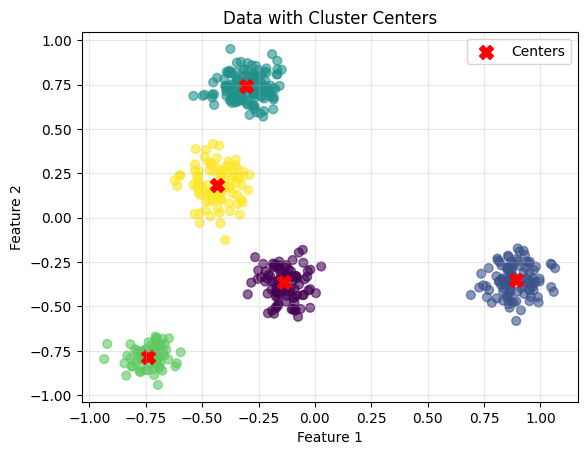

In [193]:
N, V, k, alpha, nmin = 500, 2, 5, 0, 50
Nk, R, y, X, cen = generdat(N, V, k, alpha, nmin, seed=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.6, s=40)
plt.scatter(cen[:, 0], cen[:, 1], c='red', marker='X', s=100, label='Centers')
plt.title('Data with Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 2. Data generator - updated.

In [4]:
def generdat(N, V, k, alpha, nmin, seed=None, sig_range=(0.05, 0.1)):
    if N < k * nmin:
        raise ValueError(f"N must be >= k * nmin. Got N={N}, k={k}, nmin={nmin}")
    if k < 1:
        raise ValueError("k must be at least 1")
    if alpha == 1:
        raise ValueError("alpha cannot be 1")

    if seed is not None:
        np.random.seed(seed)

    # Более равномерное распределение размеров кластеров
    if k == 1:
        Nk = np.array([N])
    else:
        base_sizes = np.ones(k, dtype=int) * nmin
        remaining = N - k * nmin
        if remaining > 0:
            additional = np.random.multinomial(remaining, np.ones(k)/k)
            Nk = base_sizes + additional
        else:
            Nk = base_sizes

    # Центры кластеров
    cen = (alpha - 1) + 2 * (1 - alpha) * np.random.rand(k, V)

    # Генерация данных с предварительным выделением памяти
    X = np.zeros((N, V))
    y = np.zeros(N, dtype=int)
    R = []
    
    sig_min, sig_max = sig_range
    start_idx = 0
    
    for k0 in range(k):
        nk = Nk[k0]
        end_idx = start_idx + nk
        
        # Диапазон для текущего кластера
        R.append(range(start_idx, end_idx))
        y[start_idx:end_idx] = k0  # Метки начинаются с 0
        
        # Генерация данных кластера
        sig = sig_min + (sig_max - sig_min) * np.random.rand(V)
        X[start_idx:end_idx] = np.random.randn(nk, V) * sig + cen[k0, :]
        
        start_idx = end_idx

    return Nk, R, y, X, cen


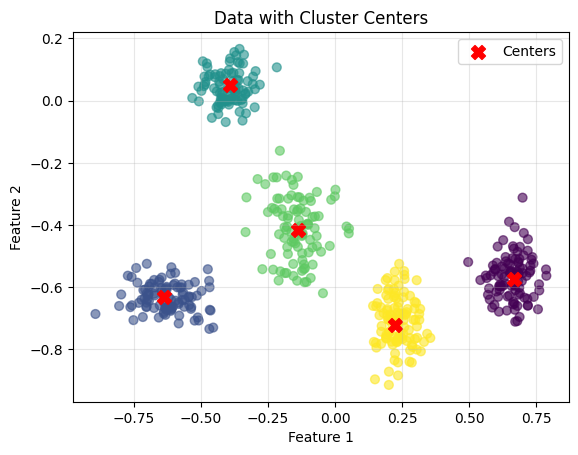

In [5]:
N, V, k, alpha, nmin = 500, 2, 5, 0, 50
Nk, R, y, X, cen = generdat(N, V, k, alpha, nmin, seed=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.6, s=40)
plt.scatter(cen[:, 0], cen[:, 1], c='red', marker='X', s=100, label='Centers')
plt.title('Data with Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

---
---
## Experiment - 1
N, V, k, alpha, nmin = 500, 3, 5, [0, 0.25, 0.5, 0.6, 0.7, 0.85, 0.99], 50

Tree_depth = 4

---
### Squeeze = 0

In [14]:
N, V, k, alpha, nmin = 500, 3, 5, 0, 50
Nk, R, y, X, cen = generdat(N, V, k, alpha, nmin, seed=42)

# X = np.array(X) if not isinstance(X, np.ndarray) else X
# y = np.array(y)

# Class names
unique_classes = np.unique(y)
class_names = [f'Cluster {i}' for i in sorted(unique_classes)]
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

encoder = OneHotEncoder(sparse_output=False)
y_oh = encoder.fit_transform(y.reshape(-1, 1))

''' Custom 1 '''
custom_1 = DecisionTree(max_depth=4, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# importances = custom_1.plot_feature_importances(feature_names)
# custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Squeeze-0.75 / Custom_1 (b=1)',feature_names=feature_names,class_names=None)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=4, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred_2 = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred_2), precision_score(y, y_pred_2, average='weighted')
recall_2, f1_2 = recall_score(y, y_pred_2, average='weighted'), f1_score(y, y_pred_2, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred_2)

# plot
# importances = custom_2.plot_feature_importances(feature_names=feature_names)
# custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Squeeze-0.75 / Custom_2 (b = p_l**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=4, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_3.plot_feature_importances(feature_names=feature_names)
# custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Squeeze-0.75 / Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=4, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_4.plot_feature_importances(feature_names=feature_names)
# custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Squeeze-0.75 / Custom_4 (b = p_l)', feature_names=feature_names, class_names=None)

''' ENTROPY '''
entropy = DecisionTree(max_depth=4, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
# importances = entropy.plot_feature_importances(feature_names=feature_names)
# entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Squeeze-0.75 / Entropy', feature_names=feature_names, class_names=None)

''' GINI '''
gini = DecisionTree(max_depth=4, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
# importances = gini.plot_feature_importances(feature_names=feature_names)
# gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Squeeze-0.75 / Gini', feature_names=feature_names, class_names=None)

ari_max = {'ari_1': ari_1,
           'ari_2': ari_2,
           'ari_3': ari_3,
           'ari_4': ari_4,
           'ari_entropy': ari_entropy,
           'ari_gini': ari_gini}

max_ari_name = max(ari_max, key=ari_max.get)
max_ari_value = ari_max[max_ari_name]

print(f"Maximum ARI: {max_ari_name} = {max_ari_value:.4f}")


results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_entropy, accuracy_gini],
                 [precision_1, precision_2, precision_3, precision_4, precision_entropy, precision_gini],
                 [recall_1, recall_2, recall_3, recall_4, recall_entropy, recall_gini],
                 [f1_1, f1_2, f1_3, f1_4, f1_entropy, f1_gini],
                 [ari_1, ari_2, ari_3, ari_4, ari_entropy, ari_gini]],4)

column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (p_l))^0.5 ','b = p_l ', 'Entropy','Gini']
table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
table

Maximum ARI: ari_entropy = 1.0000


,b = 1,b = p_l ^ 0.5,b = (p_l * (p_l))^0.5,b = p_l,Entropy,Gini
Accuracy,0.9960,0.9960,0.9980,0.9960,1.0,0.9960
Precision,0.9961,0.9961,0.9980,0.9961,1.0,0.9961
Recall,0.9960,0.9960,0.9980,0.9960,1.0,0.9960
F1 score,0.9960,0.9960,0.9980,0.9960,1.0,0.9960
ARI,0.9902,0.9902,0.9951,0.9902,1.0,0.9902


---
### Squeeze = 0.25

In [16]:
N, V, k, alpha, nmin = 500, 3, 5, 0.25, 50
Nk, R, y, X, cen = generdat(N, V, k, alpha, nmin, seed=42)

# X = np.array(X) if not isinstance(X, np.ndarray) else X
# y = np.array(y)

# Class names
unique_classes = np.unique(y)
class_names = [f'Cluster {i}' for i in sorted(unique_classes)]
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

encoder = OneHotEncoder(sparse_output=False)
y_oh = encoder.fit_transform(y.reshape(-1, 1))

''' Custom 1 '''
custom_1 = DecisionTree(max_depth=4, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# importances = custom_1.plot_feature_importances(feature_names)
# custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Squeeze-0.75 / Custom_1 (b=1)',feature_names=feature_names,class_names=None)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=4, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred_2 = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred_2), precision_score(y, y_pred_2, average='weighted')
recall_2, f1_2 = recall_score(y, y_pred_2, average='weighted'), f1_score(y, y_pred_2, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred_2)

# plot
# importances = custom_2.plot_feature_importances(feature_names=feature_names)
# custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Squeeze-0.75 / Custom_2 (b = p_l**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=4, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_3.plot_feature_importances(feature_names=feature_names)
# custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Squeeze-0.75 / Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=4, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_4.plot_feature_importances(feature_names=feature_names)
# custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Squeeze-0.75 / Custom_4 (b = p_l)', feature_names=feature_names, class_names=None)

''' ENTROPY '''
entropy = DecisionTree(max_depth=4, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
# importances = entropy.plot_feature_importances(feature_names=feature_names)
# entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Squeeze-0.75 / Entropy', feature_names=feature_names, class_names=None)

''' GINI '''
gini = DecisionTree(max_depth=4, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
# importances = gini.plot_feature_importances(feature_names=feature_names)
# gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Squeeze-0.75 / Gini', feature_names=feature_names, class_names=None)

ari_max = {'ari_1': ari_1,
           'ari_2': ari_2,
           'ari_3': ari_3,
           'ari_4': ari_4,
           'ari_entropy': ari_entropy,
           'ari_gini': ari_gini}

max_ari_name = max(ari_max, key=ari_max.get)
max_ari_value = ari_max[max_ari_name]

print(f"Maximum ARI: {max_ari_name} = {max_ari_value:.4f}")


results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_entropy, accuracy_gini],
                 [precision_1, precision_2, precision_3, precision_4, precision_entropy, precision_gini],
                 [recall_1, recall_2, recall_3, recall_4, recall_entropy, recall_gini],
                 [f1_1, f1_2, f1_3, f1_4, f1_entropy, f1_gini],
                 [ari_1, ari_2, ari_3, ari_4, ari_entropy, ari_gini]],4)

column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (p_l))^0.5 ','b = p_l ', 'Entropy','Gini']
table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
table

Maximum ARI: ari_entropy = 0.9575


,b = 1,b = p_l ^ 0.5,b = (p_l * (p_l))^0.5,b = p_l,Entropy,Gini
Accuracy,0.9800,0.9800,0.9820,0.9800,0.9820,0.9800
Precision,0.9801,0.9801,0.9820,0.9801,0.9836,0.9803
Recall,0.9800,0.9800,0.9820,0.9800,0.9820,0.9800
F1 score,0.9800,0.9800,0.9820,0.9800,0.9820,0.9800
ARI,0.9530,0.9530,0.9575,0.9530,0.9575,0.9530


--- 
### Squeeze = 0.5 

In [17]:
N, V, k, alpha, nmin = 500, 3, 5, 0.5, 50
Nk, R, y, X, cen = generdat(N, V, k, alpha, nmin, seed=42)

# X = np.array(X) if not isinstance(X, np.ndarray) else X
# y = np.array(y)

# Class names
unique_classes = np.unique(y)
class_names = [f'Cluster {i}' for i in sorted(unique_classes)]
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

encoder = OneHotEncoder(sparse_output=False)
y_oh = encoder.fit_transform(y.reshape(-1, 1))

''' Custom 1 '''
custom_1 = DecisionTree(max_depth=4, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# importances = custom_1.plot_feature_importances(feature_names)
# custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Squeeze-0.75 / Custom_1 (b=1)',feature_names=feature_names,class_names=None)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=4, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred_2 = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred_2), precision_score(y, y_pred_2, average='weighted')
recall_2, f1_2 = recall_score(y, y_pred_2, average='weighted'), f1_score(y, y_pred_2, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred_2)

# plot
# importances = custom_2.plot_feature_importances(feature_names=feature_names)
# custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Squeeze-0.75 / Custom_2 (b = p_l**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=4, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_3.plot_feature_importances(feature_names=feature_names)
# custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Squeeze-0.75 / Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=4, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_4.plot_feature_importances(feature_names=feature_names)
# custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Squeeze-0.75 / Custom_4 (b = p_l)', feature_names=feature_names, class_names=None)

''' ENTROPY '''
entropy = DecisionTree(max_depth=4, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
# importances = entropy.plot_feature_importances(feature_names=feature_names)
# entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Squeeze-0.75 / Entropy', feature_names=feature_names, class_names=None)

''' GINI '''
gini = DecisionTree(max_depth=4, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
# importances = gini.plot_feature_importances(feature_names=feature_names)
# gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Squeeze-0.75 / Gini', feature_names=feature_names, class_names=None)

ari_max = {'ari_1': ari_1,
           'ari_2': ari_2,
           'ari_3': ari_3,
           'ari_4': ari_4,
           'ari_entropy': ari_entropy,
           'ari_gini': ari_gini}

max_ari_name = max(ari_max, key=ari_max.get)
max_ari_value = ari_max[max_ari_name]

print(f"Maximum ARI: {max_ari_name} = {max_ari_value:.4f}")


results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_entropy, accuracy_gini],
                 [precision_1, precision_2, precision_3, precision_4, precision_entropy, precision_gini],
                 [recall_1, recall_2, recall_3, recall_4, recall_entropy, recall_gini],
                 [f1_1, f1_2, f1_3, f1_4, f1_entropy, f1_gini],
                 [ari_1, ari_2, ari_3, ari_4, ari_entropy, ari_gini]],4)

column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (p_l))^0.5 ','b = p_l ', 'Entropy','Gini']
table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
table

Maximum ARI: ari_gini = 0.8929


,b = 1,b = p_l ^ 0.5,b = (p_l * (p_l))^0.5,b = p_l,Entropy,Gini
Accuracy,0.9460,0.9460,0.9360,0.9460,0.9480,0.9520
Precision,0.9458,0.9458,0.9384,0.9458,0.9505,0.9531
Recall,0.9460,0.9460,0.9360,0.9460,0.9480,0.9520
F1 score,0.9459,0.9459,0.9367,0.9459,0.9482,0.9523
ARI,0.8815,0.8815,0.8548,0.8815,0.8855,0.8929


---
### Squeeze = 0.6

In [57]:
N, V, k, alpha, nmin = 500, 3, 5, 0.6, 50
Nk, R, y, X, cen = generdat(N, V, k, alpha, nmin, seed=42)

# X = np.array(X) if not isinstance(X, np.ndarray) else X
# y = np.array(y)

# Class names
unique_classes = np.unique(y)
class_names = [f'Cluster {i}' for i in sorted(unique_classes)]
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

encoder = OneHotEncoder(sparse_output=False)
y_oh = encoder.fit_transform(y.reshape(-1, 1))

''' Custom 1 '''
custom_1 = DecisionTree(max_depth=4, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# importances = custom_1.plot_feature_importances(feature_names)
# custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Squeeze-0.75 / Custom_1 (b=1)',feature_names=feature_names,class_names=None)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=4, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred_2 = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred_2), precision_score(y, y_pred_2, average='weighted')
recall_2, f1_2 = recall_score(y, y_pred_2, average='weighted'), f1_score(y, y_pred_2, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred_2)

# plot
# importances = custom_2.plot_feature_importances(feature_names=feature_names)
# custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Squeeze-0.75 / Custom_2 (b = p_l**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=4, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_3.plot_feature_importances(feature_names=feature_names)
# custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Squeeze-0.75 / Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=4, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_4.plot_feature_importances(feature_names=feature_names)
# custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Squeeze-0.75 / Custom_4 (b = p_l)', feature_names=feature_names, class_names=None)

''' ENTROPY '''
entropy = DecisionTree(max_depth=4, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
# importances = entropy.plot_feature_importances(feature_names=feature_names)
# entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Squeeze-0.75 / Entropy', feature_names=feature_names, class_names=None)

''' GINI '''
gini = DecisionTree(max_depth=4, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
# importances = gini.plot_feature_importances(feature_names=feature_names)
# gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Squeeze-0.75 / Gini', feature_names=feature_names, class_names=None)

ari_max = {'ari_1': ari_1,
           'ari_2': ari_2,
           'ari_3': ari_3,
           'ari_4': ari_4,
           'ari_entropy': ari_entropy,
           'ari_gini': ari_gini}

max_ari_name = max(ari_max, key=ari_max.get)
max_ari_value = ari_max[max_ari_name]

print(f"Maximum ARI: {max_ari_name} = {max_ari_value:.4f}")


results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_entropy, accuracy_gini],
                 [precision_1, precision_2, precision_3, precision_4, precision_entropy, precision_gini],
                 [recall_1, recall_2, recall_3, recall_4, recall_entropy, recall_gini],
                 [f1_1, f1_2, f1_3, f1_4, f1_entropy, f1_gini],
                 [ari_1, ari_2, ari_3, ari_4, ari_entropy, ari_gini]],4)

column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (p_l))^0.5 ','b = p_l ', 'Entropy','Gini']
table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
table

Maximum ARI: ari_gini = 0.8378


,b = 1,b = p_l ^ 0.5,b = (p_l * (p_l))^0.5,b = p_l,Entropy,Gini
Accuracy,0.9120,0.9120,0.9100,0.9120,0.9200,0.9220
Precision,0.9132,0.9132,0.9119,0.9132,0.9250,0.9253
Recall,0.9120,0.9120,0.9100,0.9120,0.9200,0.9220
F1 score,0.9111,0.9111,0.9093,0.9111,0.9201,0.9217
ARI,0.8194,0.8194,0.8128,0.8194,0.8320,0.8378


--- 
### Squeeze = 0.75 

In [18]:
N, V, k, alpha, nmin = 500, 3, 5, 0.75, 50
Nk, R, y, X, cen = generdat(N, V, k, alpha, nmin, seed=42)

# X = np.array(X) if not isinstance(X, np.ndarray) else X
# y = np.array(y)

# Class names
unique_classes = np.unique(y)
class_names = [f'Cluster {i}' for i in sorted(unique_classes)]
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

encoder = OneHotEncoder(sparse_output=False)
y_oh = encoder.fit_transform(y.reshape(-1, 1))

''' Custom 1 '''
custom_1 = DecisionTree(max_depth=4, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# importances = custom_1.plot_feature_importances(feature_names)
# custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Squeeze-0.75 / Custom_1 (b=1)',feature_names=feature_names,class_names=None)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=4, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred_2 = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred_2), precision_score(y, y_pred_2, average='weighted')
recall_2, f1_2 = recall_score(y, y_pred_2, average='weighted'), f1_score(y, y_pred_2, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred_2)

# plot
# importances = custom_2.plot_feature_importances(feature_names=feature_names)
# custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Squeeze-0.75 / Custom_2 (b = p_l**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=4, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_3.plot_feature_importances(feature_names=feature_names)
# custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Squeeze-0.75 / Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=4, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_4.plot_feature_importances(feature_names=feature_names)
# custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Squeeze-0.75 / Custom_4 (b = p_l)', feature_names=feature_names, class_names=None)

''' ENTROPY '''
entropy = DecisionTree(max_depth=4, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
# importances = entropy.plot_feature_importances(feature_names=feature_names)
# entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Squeeze-0.75 / Entropy', feature_names=feature_names, class_names=None)

''' GINI '''
gini = DecisionTree(max_depth=4, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
# importances = gini.plot_feature_importances(feature_names=feature_names)
# gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Squeeze-0.75 / Gini', feature_names=feature_names, class_names=None)

ari_max = {'ari_1': ari_1,
           'ari_2': ari_2,
           'ari_3': ari_3,
           'ari_4': ari_4,
           'ari_entropy': ari_entropy,
           'ari_gini': ari_gini}

max_ari_name = max(ari_max, key=ari_max.get)
max_ari_value = ari_max[max_ari_name]

print(f"Maximum ARI: {max_ari_name} = {max_ari_value:.4f}")


results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_entropy, accuracy_gini],
                 [precision_1, precision_2, precision_3, precision_4, precision_entropy, precision_gini],
                 [recall_1, recall_2, recall_3, recall_4, recall_entropy, recall_gini],
                 [f1_1, f1_2, f1_3, f1_4, f1_entropy, f1_gini],
                 [ari_1, ari_2, ari_3, ari_4, ari_entropy, ari_gini]],4)

column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (p_l))^0.5 ','b = p_l ', 'Entropy','Gini']
table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
table

Maximum ARI: ari_entropy = 0.6570


,b = 1,b = p_l ^ 0.5,b = (p_l * (p_l))^0.5,b = p_l,Entropy,Gini
Accuracy,0.7960,0.7940,0.7160,0.7940,0.8240,0.8200
Precision,0.8278,0.8255,0.7954,0.8255,0.8349,0.8325
Recall,0.7960,0.7940,0.7160,0.7940,0.8240,0.8200
F1 score,0.7942,0.7918,0.6545,0.7918,0.8152,0.8207
ARI,0.5877,0.5844,0.5718,0.5844,0.6570,0.6467


---
### Squeeze = 0.85

In [58]:
N, V, k, alpha, nmin = 500, 3, 5, 0.85, 50
Nk, R, y, X, cen = generdat(N, V, k, alpha, nmin, seed=42)

# X = np.array(X) if not isinstance(X, np.ndarray) else X
# y = np.array(y)

# Class names
unique_classes = np.unique(y)
class_names = [f'Cluster {i}' for i in sorted(unique_classes)]
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

encoder = OneHotEncoder(sparse_output=False)
y_oh = encoder.fit_transform(y.reshape(-1, 1))

''' Custom 1 '''
custom_1 = DecisionTree(max_depth=4, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# importances = custom_1.plot_feature_importances(feature_names)
# custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Squeeze-0.75 / Custom_1 (b=1)',feature_names=feature_names,class_names=None)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=4, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred_2 = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred_2), precision_score(y, y_pred_2, average='weighted')
recall_2, f1_2 = recall_score(y, y_pred_2, average='weighted'), f1_score(y, y_pred_2, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred_2)

# plot
# importances = custom_2.plot_feature_importances(feature_names=feature_names)
# custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Squeeze-0.75 / Custom_2 (b = p_l**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=4, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_3.plot_feature_importances(feature_names=feature_names)
# custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Squeeze-0.75 / Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=4, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_4.plot_feature_importances(feature_names=feature_names)
# custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Squeeze-0.75 / Custom_4 (b = p_l)', feature_names=feature_names, class_names=None)

''' ENTROPY '''
entropy = DecisionTree(max_depth=4, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
# importances = entropy.plot_feature_importances(feature_names=feature_names)
# entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Squeeze-0.75 / Entropy', feature_names=feature_names, class_names=None)

''' GINI '''
gini = DecisionTree(max_depth=4, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
# importances = gini.plot_feature_importances(feature_names=feature_names)
# gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Squeeze-0.75 / Gini', feature_names=feature_names, class_names=None)

ari_max = {'ari_1': ari_1,
           'ari_2': ari_2,
           'ari_3': ari_3,
           'ari_4': ari_4,
           'ari_entropy': ari_entropy,
           'ari_gini': ari_gini}

max_ari_name = max(ari_max, key=ari_max.get)
max_ari_value = ari_max[max_ari_name]

print(f"Maximum ARI: {max_ari_name} = {max_ari_value:.4f}")


results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_entropy, accuracy_gini],
                 [precision_1, precision_2, precision_3, precision_4, precision_entropy, precision_gini],
                 [recall_1, recall_2, recall_3, recall_4, recall_entropy, recall_gini],
                 [f1_1, f1_2, f1_3, f1_4, f1_entropy, f1_gini],
                 [ari_1, ari_2, ari_3, ari_4, ari_entropy, ari_gini]],4)

column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (p_l))^0.5 ','b = p_l ', 'Entropy','Gini']
table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
table

/Users/user/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/user/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Maximum ARI: ari_gini = 0.3900


,b = 1,b = p_l ^ 0.5,b = (p_l * (p_l))^0.5,b = p_l,Entropy,Gini
Accuracy,0.6160,0.5860,0.5280,0.5860,0.6500,0.6740
Precision,0.6400,0.4777,0.5413,0.4777,0.6555,0.6909
Recall,0.6160,0.5860,0.5280,0.5860,0.6500,0.6740
F1 score,0.6175,0.5204,0.4265,0.5204,0.6433,0.6643
ARI,0.3271,0.3241,0.2941,0.3241,0.3776,0.3900


--- 
### Squeeze = 0.99 

In [ ]:
N, V, k, alpha, nmin = 500, 3, 5, 0.99, 50
Nk, R, y, X, cen = generdat(N, V, k, alpha, nmin, seed=42)

# X = np.array(X) if not isinstance(X, np.ndarray) else X
# y = np.array(y)

# Class names
unique_classes = np.unique(y)
class_names = [f'Cluster {i}' for i in sorted(unique_classes)]
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

encoder = OneHotEncoder(sparse_output=False)
y_oh = encoder.fit_transform(y.reshape(-1, 1))

''' Custom 1 '''
custom_1 = DecisionTree(max_depth=4, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# importances = custom_1.plot_feature_importances(feature_names)
# custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Squeeze-0.75 / Custom_1 (b=1)',feature_names=feature_names,class_names=None)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=4, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred_2 = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred_2), precision_score(y, y_pred_2, average='weighted')
recall_2, f1_2 = recall_score(y, y_pred_2, average='weighted'), f1_score(y, y_pred_2, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred_2)

# plot
# importances = custom_2.plot_feature_importances(feature_names=feature_names)
# custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Squeeze-0.75 / Custom_2 (b = p_l**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=4, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_3.plot_feature_importances(feature_names=feature_names)
# custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Squeeze-0.75 / Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=4, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_4.plot_feature_importances(feature_names=feature_names)
# custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Squeeze-0.75 / Custom_4 (b = p_l)', feature_names=feature_names, class_names=None)

''' ENTROPY '''
entropy = DecisionTree(max_depth=4, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
# importances = entropy.plot_feature_importances(feature_names=feature_names)
# entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Squeeze-0.75 / Entropy', feature_names=feature_names, class_names=None)

''' GINI '''
gini = DecisionTree(max_depth=4, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
# importances = gini.plot_feature_importances(feature_names=feature_names)
# gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Squeeze-0.75 / Gini', feature_names=feature_names, class_names=None)

ari_max = {'ari_1': ari_1,
           'ari_2': ari_2,
           'ari_3': ari_3,
           'ari_4': ari_4,
           'ari_entropy': ari_entropy,
           'ari_gini': ari_gini}

max_ari_name = max(ari_max, key=ari_max.get)
max_ari_value = ari_max[max_ari_name]

print(f"Maximum ARI: {max_ari_name} = {max_ari_value:.4f}")


results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_entropy, accuracy_gini],
                 [precision_1, precision_2, precision_3, precision_4, precision_entropy, precision_gini],
                 [recall_1, recall_2, recall_3, recall_4, recall_entropy, recall_gini],
                 [f1_1, f1_2, f1_3, f1_4, f1_entropy, f1_gini],
                 [ari_1, ari_2, ari_3, ari_4, ari_entropy, ari_gini]],4)

column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (p_l))^0.5 ','b = p_l ', 'Entropy','Gini']
table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
table

/Users/user/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/user/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Maximum ARI: ari_4 = 0.0273


,b = 1,b = p_l ^ 0.5,b = (p_l * (p_l))^0.5,b = p_l,Entropy,Gini
Accuracy,0.3140,0.3220,0.2820,0.3220,0.3380,0.3360
Precision,0.3097,0.3941,0.3219,0.3342,0.4945,0.4601
Recall,0.3140,0.3220,0.2820,0.3220,0.3380,0.3360
F1 score,0.2713,0.2739,0.1745,0.2710,0.3072,0.3031
ARI,0.0218,0.0271,0.0181,0.0273,0.0210,0.0269


---
---
## Experiment - 2

N, V, k, alpha, nmin = 2000, 10, 7, [0, 0.25, 0.5, 0.6, 0.7, 0.85, 0.99], 50

Tree_depth = 4

---
### Squeeze = 0

In [34]:
N, V, k, alpha, nmin = 2000, 10, 7, 0, 50
Nk, R, y, X, cen = generdat(N, V, k, alpha, nmin, seed=42)

# X = np.array(X) if not isinstance(X, np.ndarray) else X
# y = np.array(y)

# Class names
unique_classes = np.unique(y)
class_names = [f'Cluster {i}' for i in sorted(unique_classes)]
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

encoder = OneHotEncoder(sparse_output=False)
y_oh = encoder.fit_transform(y.reshape(-1, 1))

''' Custom 1 '''
custom_1 = DecisionTree(max_depth=4, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# importances = custom_1.plot_feature_importances(feature_names)
# custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Squeeze-0.75 / Custom_1 (b=1)',feature_names=feature_names,class_names=None)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=4, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred_2 = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred_2), precision_score(y, y_pred_2, average='weighted', zero_division=0)
recall_2, f1_2 = recall_score(y, y_pred_2, average='weighted'), f1_score(y, y_pred_2, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred_2)

# plot
# importances = custom_2.plot_feature_importances(feature_names=feature_names)
# custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Squeeze-0.75 / Custom_2 (b = p_l**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=4, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_3.plot_feature_importances(feature_names=feature_names)
# custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Squeeze-0.75 / Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=4, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_4.plot_feature_importances(feature_names=feature_names)
# custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Squeeze-0.75 / Custom_4 (b = p_l)', feature_names=feature_names, class_names=None)

''' ENTROPY '''
entropy = DecisionTree(max_depth=4, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
# importances = entropy.plot_feature_importances(feature_names=feature_names)
# entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Squeeze-0.75 / Entropy', feature_names=feature_names, class_names=None)

''' GINI '''
gini = DecisionTree(max_depth=4, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
# importances = gini.plot_feature_importances(feature_names=feature_names)
# gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Squeeze-0.75 / Gini', feature_names=feature_names, class_names=None)

ari_max = {'ari_1': ari_1,
           'ari_2': ari_2,
           'ari_3': ari_3,
           'ari_4': ari_4,
           'ari_entropy': ari_entropy,
           'ari_gini': ari_gini}

max_ari_name = max(ari_max, key=ari_max.get)
max_ari_value = ari_max[max_ari_name]

print(f"Maximum ARI: {max_ari_name} = {max_ari_value:.4f}")


results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_entropy, accuracy_gini],
                 [precision_1, precision_2, precision_3, precision_4, precision_entropy, precision_gini],
                 [recall_1, recall_2, recall_3, recall_4, recall_entropy, recall_gini],
                 [f1_1, f1_2, f1_3, f1_4, f1_entropy, f1_gini],
                 [ari_1, ari_2, ari_3, ari_4, ari_entropy, ari_gini]],4)

column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (p_l))^0.5 ','b = p_l ', 'Entropy','Gini']
table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
table

Maximum ARI: ari_entropy = 1.0000


,b = 1,b = p_l ^ 0.5,b = (p_l * (p_l))^0.5,b = p_l,Entropy,Gini
Accuracy,0.7335,0.7335,0.9985,0.7335,1.0,0.7335
Precision,0.6424,0.6424,0.9985,0.6424,1.0,0.6424
Recall,0.7335,0.7335,0.9985,0.7335,1.0,0.7335
F1 score,0.6656,0.6656,0.9985,0.6656,1.0,0.6656
ARI,0.6624,0.6624,0.9966,0.6624,1.0,0.6624


---
### Squeeze = 0.25

In [33]:
N, V, k, alpha, nmin = 2000, 10, 7, 0.25, 50
Nk, R, y, X, cen = generdat(N, V, k, alpha, nmin, seed=42)

# X = np.array(X) if not isinstance(X, np.ndarray) else X
# y = np.array(y)

# Class names
unique_classes = np.unique(y)
class_names = [f'Cluster {i}' for i in sorted(unique_classes)]
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

encoder = OneHotEncoder(sparse_output=False)
y_oh = encoder.fit_transform(y.reshape(-1, 1))

''' Custom 1 '''
custom_1 = DecisionTree(max_depth=4, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# importances = custom_1.plot_feature_importances(feature_names)
# custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Squeeze-0.75 / Custom_1 (b=1)',feature_names=feature_names,class_names=None)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=4, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred_2 = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred_2), precision_score(y, y_pred_2, average='weighted', zero_division=0)
recall_2, f1_2 = recall_score(y, y_pred_2, average='weighted'), f1_score(y, y_pred_2, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred_2)

# plot
# importances = custom_2.plot_feature_importances(feature_names=feature_names)
# custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Squeeze-0.75 / Custom_2 (b = p_l**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=4, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_3.plot_feature_importances(feature_names=feature_names)
# custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Squeeze-0.75 / Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=4, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_4.plot_feature_importances(feature_names=feature_names)
# custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Squeeze-0.75 / Custom_4 (b = p_l)', feature_names=feature_names, class_names=None)

''' ENTROPY '''
entropy = DecisionTree(max_depth=4, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
# importances = entropy.plot_feature_importances(feature_names=feature_names)
# entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Squeeze-0.75 / Entropy', feature_names=feature_names, class_names=None)

''' GINI '''
gini = DecisionTree(max_depth=4, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
# importances = gini.plot_feature_importances(feature_names=feature_names)
# gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Squeeze-0.75 / Gini', feature_names=feature_names, class_names=None)

ari_max = {'ari_1': ari_1,
           'ari_2': ari_2,
           'ari_3': ari_3,
           'ari_4': ari_4,
           'ari_entropy': ari_entropy,
           'ari_gini': ari_gini}

max_ari_name = max(ari_max, key=ari_max.get)
max_ari_value = ari_max[max_ari_name]

print(f"Maximum ARI: {max_ari_name} = {max_ari_value:.4f}")


results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_entropy, accuracy_gini],
                 [precision_1, precision_2, precision_3, precision_4, precision_entropy, precision_gini],
                 [recall_1, recall_2, recall_3, recall_4, recall_entropy, recall_gini],
                 [f1_1, f1_2, f1_3, f1_4, f1_entropy, f1_gini],
                 [ari_1, ari_2, ari_3, ari_4, ari_entropy, ari_gini]],4)

column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (p_l))^0.5 ','b = p_l ', 'Entropy','Gini']
table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
table

Maximum ARI: ari_entropy = 1.0000


,b = 1,b = p_l ^ 0.5,b = (p_l * (p_l))^0.5,b = p_l,Entropy,Gini
Accuracy,0.7335,0.7310,0.9990,0.7310,1.0,0.7335
Precision,0.6398,0.6411,0.9990,0.6411,1.0,0.6398
Recall,0.7335,0.7310,0.9990,0.7310,1.0,0.7335
F1 score,0.6642,0.6638,0.9990,0.6638,1.0,0.6642
ARI,0.6539,0.6560,0.9977,0.6560,1.0,0.6539


---
### Squeeze = 0.5

In [32]:
N, V, k, alpha, nmin = 2000, 10, 7, 0.5, 50
Nk, R, y, X, cen = generdat(N, V, k, alpha, nmin, seed=42)

# X = np.array(X) if not isinstance(X, np.ndarray) else X
# y = np.array(y)

# Class names
unique_classes = np.unique(y)
class_names = [f'Cluster {i}' for i in sorted(unique_classes)]
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

encoder = OneHotEncoder(sparse_output=False)
y_oh = encoder.fit_transform(y.reshape(-1, 1))

''' Custom 1 '''
custom_1 = DecisionTree(max_depth=4, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# importances = custom_1.plot_feature_importances(feature_names)
# custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Squeeze-0.75 / Custom_1 (b=1)',feature_names=feature_names,class_names=None)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=4, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred_2 = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred_2), precision_score(y, y_pred_2, average='weighted', zero_division=0)
recall_2, f1_2 = recall_score(y, y_pred_2, average='weighted'), f1_score(y, y_pred_2, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred_2)

# plot
# importances = custom_2.plot_feature_importances(feature_names=feature_names)
# custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Squeeze-0.75 / Custom_2 (b = p_l**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=4, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_3.plot_feature_importances(feature_names=feature_names)
# custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Squeeze-0.75 / Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=4, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_4.plot_feature_importances(feature_names=feature_names)
# custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Squeeze-0.75 / Custom_4 (b = p_l)', feature_names=feature_names, class_names=None)

''' ENTROPY '''
entropy = DecisionTree(max_depth=4, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
# importances = entropy.plot_feature_importances(feature_names=feature_names)
# entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Squeeze-0.75 / Entropy', feature_names=feature_names, class_names=None)

''' GINI '''
gini = DecisionTree(max_depth=4, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
# importances = gini.plot_feature_importances(feature_names=feature_names)
# gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Squeeze-0.75 / Gini', feature_names=feature_names, class_names=None)

ari_max = {'ari_1': ari_1,
           'ari_2': ari_2,
           'ari_3': ari_3,
           'ari_4': ari_4,
           'ari_entropy': ari_entropy,
           'ari_gini': ari_gini}

max_ari_name = max(ari_max, key=ari_max.get)
max_ari_value = ari_max[max_ari_name]

print(f"Maximum ARI: {max_ari_name} = {max_ari_value:.4f}")


results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_entropy, accuracy_gini],
                 [precision_1, precision_2, precision_3, precision_4, precision_entropy, precision_gini],
                 [recall_1, recall_2, recall_3, recall_4, recall_entropy, recall_gini],
                 [f1_1, f1_2, f1_3, f1_4, f1_entropy, f1_gini],
                 [ari_1, ari_2, ari_3, ari_4, ari_entropy, ari_gini]],4)

column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (p_l))^0.5 ','b = p_l ', 'Entropy','Gini']
table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
table

Maximum ARI: ari_entropy = 1.0000


,b = 1,b = p_l ^ 0.5,b = (p_l * (p_l))^0.5,b = p_l,Entropy,Gini
Accuracy,0.7315,0.7315,0.992,0.7315,1.0,0.7325
Precision,0.6382,0.6382,0.992,0.6382,1.0,0.7722
Recall,0.7315,0.7315,0.992,0.7315,1.0,0.7325
F1 score,0.6624,0.6624,0.992,0.6624,1.0,0.6641
ARI,0.6489,0.6489,0.982,0.6489,1.0,0.6501


---
### Squeeze = 0.6

In [31]:
N, V, k, alpha, nmin = 2000, 10, 7, 0.6, 50
Nk, R, y, X, cen = generdat(N, V, k, alpha, nmin, seed=42)

# X = np.array(X) if not isinstance(X, np.ndarray) else X
# y = np.array(y)

# Class names
unique_classes = np.unique(y)
class_names = [f'Cluster {i}' for i in sorted(unique_classes)]
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

encoder = OneHotEncoder(sparse_output=False)
y_oh = encoder.fit_transform(y.reshape(-1, 1))

''' Custom 1 '''
custom_1 = DecisionTree(max_depth=4, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# importances = custom_1.plot_feature_importances(feature_names)
# custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Squeeze-0.75 / Custom_1 (b=1)',feature_names=feature_names,class_names=None)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=4, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred_2 = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred_2), precision_score(y, y_pred_2, average='weighted', zero_division=0)
recall_2, f1_2 = recall_score(y, y_pred_2, average='weighted'), f1_score(y, y_pred_2, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred_2)

# plot
# importances = custom_2.plot_feature_importances(feature_names=feature_names)
# custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Squeeze-0.75 / Custom_2 (b = p_l**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=4, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_3.plot_feature_importances(feature_names=feature_names)
# custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Squeeze-0.75 / Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=4, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_4.plot_feature_importances(feature_names=feature_names)
# custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Squeeze-0.75 / Custom_4 (b = p_l)', feature_names=feature_names, class_names=None)

''' ENTROPY '''
entropy = DecisionTree(max_depth=4, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
# importances = entropy.plot_feature_importances(feature_names=feature_names)
# entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Squeeze-0.75 / Entropy', feature_names=feature_names, class_names=None)

''' GINI '''
gini = DecisionTree(max_depth=4, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
# importances = gini.plot_feature_importances(feature_names=feature_names)
# gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Squeeze-0.75 / Gini', feature_names=feature_names, class_names=None)

ari_max = {'ari_1': ari_1,
           'ari_2': ari_2,
           'ari_3': ari_3,
           'ari_4': ari_4,
           'ari_entropy': ari_entropy,
           'ari_gini': ari_gini}

max_ari_name = max(ari_max, key=ari_max.get)
max_ari_value = ari_max[max_ari_name]

print(f"Maximum ARI: {max_ari_name} = {max_ari_value:.4f}")


results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_entropy, accuracy_gini],
                 [precision_1, precision_2, precision_3, precision_4, precision_entropy, precision_gini],
                 [recall_1, recall_2, recall_3, recall_4, recall_entropy, recall_gini],
                 [f1_1, f1_2, f1_3, f1_4, f1_entropy, f1_gini],
                 [ari_1, ari_2, ari_3, ari_4, ari_entropy, ari_gini]],4)

column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (p_l))^0.5 ','b = p_l ', 'Entropy','Gini']
table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
table

Maximum ARI: ari_1 = 0.9989


,b = 1,b = p_l ^ 0.5,b = (p_l * (p_l))^0.5,b = p_l,Entropy,Gini
Accuracy,0.9995,0.7265,0.9780,0.7265,0.9965,0.9995
Precision,0.9995,0.6351,0.9782,0.6351,0.9965,0.9995
Recall,0.9995,0.7265,0.9780,0.7265,0.9965,0.9995
F1 score,0.9995,0.6584,0.9780,0.6584,0.9965,0.9995
ARI,0.9989,0.6380,0.9508,0.6380,0.9918,0.9989


---
### Squeeze = 0.75

In [30]:
N, V, k, alpha, nmin = 2000, 10, 7, 0.75, 50
Nk, R, y, X, cen = generdat(N, V, k, alpha, nmin, seed=42)

# X = np.array(X) if not isinstance(X, np.ndarray) else X
# y = np.array(y)

# Class names
unique_classes = np.unique(y)
class_names = [f'Cluster {i}' for i in sorted(unique_classes)]
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

encoder = OneHotEncoder(sparse_output=False)
y_oh = encoder.fit_transform(y.reshape(-1, 1))

''' Custom 1 '''
custom_1 = DecisionTree(max_depth=4, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# importances = custom_1.plot_feature_importances(feature_names)
# custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Squeeze-0.75 / Custom_1 (b=1)',feature_names=feature_names,class_names=None)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=4, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred_2 = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred_2), precision_score(y, y_pred_2, average='weighted', zero_division=0)
recall_2, f1_2 = recall_score(y, y_pred_2, average='weighted'), f1_score(y, y_pred_2, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred_2)

# plot
# importances = custom_2.plot_feature_importances(feature_names=feature_names)
# custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Squeeze-0.75 / Custom_2 (b = p_l**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=4, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_3.plot_feature_importances(feature_names=feature_names)
# custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Squeeze-0.75 / Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=4, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_4.plot_feature_importances(feature_names=feature_names)
# custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Squeeze-0.75 / Custom_4 (b = p_l)', feature_names=feature_names, class_names=None)

''' ENTROPY '''
entropy = DecisionTree(max_depth=4, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
# importances = entropy.plot_feature_importances(feature_names=feature_names)
# entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Squeeze-0.75 / Entropy', feature_names=feature_names, class_names=None)

''' GINI '''
gini = DecisionTree(max_depth=4, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
# importances = gini.plot_feature_importances(feature_names=feature_names)
# gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Squeeze-0.75 / Gini', feature_names=feature_names, class_names=None)

ari_max = {'ari_1': ari_1,
           'ari_2': ari_2,
           'ari_3': ari_3,
           'ari_4': ari_4,
           'ari_entropy': ari_entropy,
           'ari_gini': ari_gini}

max_ari_name = max(ari_max, key=ari_max.get)
max_ari_value = ari_max[max_ari_name]

print(f"Maximum ARI: {max_ari_name} = {max_ari_value:.4f}")


results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_entropy, accuracy_gini],
                 [precision_1, precision_2, precision_3, precision_4, precision_entropy, precision_gini],
                 [recall_1, recall_2, recall_3, recall_4, recall_entropy, recall_gini],
                 [f1_1, f1_2, f1_3, f1_4, f1_entropy, f1_gini],
                 [ari_1, ari_2, ari_3, ari_4, ari_entropy, ari_gini]],4)

column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (p_l))^0.5 ','b = p_l ', 'Entropy','Gini']
table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
table

Maximum ARI: ari_entropy = 0.9270


,b = 1,b = p_l ^ 0.5,b = (p_l * (p_l))^0.5,b = p_l,Entropy,Gini
Accuracy,0.8200,0.9510,0.9365,0.9505,0.9680,0.9610
Precision,0.7555,0.9537,0.9403,0.9533,0.9700,0.9638
Recall,0.8200,0.9510,0.9365,0.9505,0.9680,0.9610
F1 score,0.7753,0.9512,0.9364,0.9506,0.9684,0.9613
ARI,0.7613,0.8886,0.8574,0.8876,0.9270,0.9104


---
### Squeeze = 0.85

In [59]:
N, V, k, alpha, nmin = 2000, 10, 7, 0.85, 50
Nk, R, y, X, cen = generdat(N, V, k, alpha, nmin, seed=42)

# X = np.array(X) if not isinstance(X, np.ndarray) else X
# y = np.array(y)

# Class names
unique_classes = np.unique(y)
class_names = [f'Cluster {i}' for i in sorted(unique_classes)]
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

encoder = OneHotEncoder(sparse_output=False)
y_oh = encoder.fit_transform(y.reshape(-1, 1))

''' Custom 1 '''
custom_1 = DecisionTree(max_depth=4, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# importances = custom_1.plot_feature_importances(feature_names)
# custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Squeeze-0.75 / Custom_1 (b=1)',feature_names=feature_names,class_names=None)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=4, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred_2 = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred_2), precision_score(y, y_pred_2, average='weighted', zero_division=0)
recall_2, f1_2 = recall_score(y, y_pred_2, average='weighted'), f1_score(y, y_pred_2, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred_2)

# plot
# importances = custom_2.plot_feature_importances(feature_names=feature_names)
# custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Squeeze-0.75 / Custom_2 (b = p_l**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=4, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_3.plot_feature_importances(feature_names=feature_names)
# custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Squeeze-0.75 / Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=4, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_4.plot_feature_importances(feature_names=feature_names)
# custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Squeeze-0.75 / Custom_4 (b = p_l)', feature_names=feature_names, class_names=None)

''' ENTROPY '''
entropy = DecisionTree(max_depth=4, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
# importances = entropy.plot_feature_importances(feature_names=feature_names)
# entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Squeeze-0.75 / Entropy', feature_names=feature_names, class_names=None)

''' GINI '''
gini = DecisionTree(max_depth=4, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
# importances = gini.plot_feature_importances(feature_names=feature_names)
# gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Squeeze-0.75 / Gini', feature_names=feature_names, class_names=None)

ari_max = {'ari_1': ari_1,
           'ari_2': ari_2,
           'ari_3': ari_3,
           'ari_4': ari_4,
           'ari_entropy': ari_entropy,
           'ari_gini': ari_gini}

max_ari_name = max(ari_max, key=ari_max.get)
max_ari_value = ari_max[max_ari_name]

print(f"Maximum ARI: {max_ari_name} = {max_ari_value:.4f}")


results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_entropy, accuracy_gini],
                 [precision_1, precision_2, precision_3, precision_4, precision_entropy, precision_gini],
                 [recall_1, recall_2, recall_3, recall_4, recall_entropy, recall_gini],
                 [f1_1, f1_2, f1_3, f1_4, f1_entropy, f1_gini],
                 [ari_1, ari_2, ari_3, ari_4, ari_entropy, ari_gini]],4)

column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (p_l))^0.5 ','b = p_l ', 'Entropy','Gini']
table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
table

Maximum ARI: ari_entropy = 0.6525


,b = 1,b = p_l ^ 0.5,b = (p_l * (p_l))^0.5,b = p_l,Entropy,Gini
Accuracy,0.7445,0.7445,0.5180,0.7445,0.8320,0.8040
Precision,0.7593,0.7593,0.4709,0.7593,0.8426,0.8247
Recall,0.7445,0.7445,0.5180,0.7445,0.8320,0.8040
F1 score,0.7441,0.7441,0.3984,0.7441,0.8341,0.8042
ARI,0.5153,0.5153,0.3912,0.5153,0.6525,0.6011


---
### Squeeze = 0.99

In [28]:
N, V, k, alpha, nmin = 2000, 10, 7, 0.99, 50
Nk, R, y, X, cen = generdat(N, V, k, alpha, nmin, seed=42)

# X = np.array(X) if not isinstance(X, np.ndarray) else X
# y = np.array(y)

# Class names
unique_classes = np.unique(y)
class_names = [f'Cluster {i}' for i in sorted(unique_classes)]
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

encoder = OneHotEncoder(sparse_output=False)
y_oh = encoder.fit_transform(y.reshape(-1, 1))

''' Custom 1 '''
custom_1 = DecisionTree(max_depth=4, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# importances = custom_1.plot_feature_importances(feature_names)
# custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Squeeze-0.75 / Custom_1 (b=1)',feature_names=feature_names,class_names=None)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=4, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred_2 = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred_2), precision_score(y, y_pred_2, average='weighted', zero_division=0)
recall_2, f1_2 = recall_score(y, y_pred_2, average='weighted'), f1_score(y, y_pred_2, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred_2)

# plot
# importances = custom_2.plot_feature_importances(feature_names=feature_names)
# custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Squeeze-0.75 / Custom_2 (b = p_l**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=4, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_3.plot_feature_importances(feature_names=feature_names)
# custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Squeeze-0.75 / Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=4, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_4.plot_feature_importances(feature_names=feature_names)
# custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Squeeze-0.75 / Custom_4 (b = p_l)', feature_names=feature_names, class_names=None)

''' ENTROPY '''
entropy = DecisionTree(max_depth=4, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
# importances = entropy.plot_feature_importances(feature_names=feature_names)
# entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Squeeze-0.75 / Entropy', feature_names=feature_names, class_names=None)

''' GINI '''
gini = DecisionTree(max_depth=4, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
# importances = gini.plot_feature_importances(feature_names=feature_names)
# gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Squeeze-0.75 / Gini', feature_names=feature_names, class_names=None)

ari_max = {'ari_1': ari_1,
           'ari_2': ari_2,
           'ari_3': ari_3,
           'ari_4': ari_4,
           'ari_entropy': ari_entropy,
           'ari_gini': ari_gini}

max_ari_name = max(ari_max, key=ari_max.get)
max_ari_value = ari_max[max_ari_name]

print(f"Maximum ARI: {max_ari_name} = {max_ari_value:.4f}")


results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_entropy, accuracy_gini],
                 [precision_1, precision_2, precision_3, precision_4, precision_entropy, precision_gini],
                 [recall_1, recall_2, recall_3, recall_4, recall_entropy, recall_gini],
                 [f1_1, f1_2, f1_3, f1_4, f1_entropy, f1_gini],
                 [ari_1, ari_2, ari_3, ari_4, ari_entropy, ari_gini]],4)

column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (p_l))^0.5 ','b = p_l ', 'Entropy','Gini']
table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
table

Maximum ARI: ari_4 = 0.0090


,b = 1,b = p_l ^ 0.5,b = (p_l * (p_l))^0.5,b = p_l,Entropy,Gini
Accuracy,0.2045,0.2040,0.1710,0.2070,0.2200,0.2210
Precision,0.3599,0.3329,0.3572,0.1709,0.4605,0.3173
Recall,0.2045,0.2040,0.1710,0.2070,0.2200,0.2210
F1 score,0.1401,0.1407,0.0823,0.1393,0.1844,0.1884
ARI,0.0082,0.0081,0.0026,0.0090,0.0086,0.0078


---
---
## Experiment - 3

N, V, k, alpha, nmin = 2000, 15, 7, [0, 0.25, 0.5, 0.6, 0.7, 0.85, 0.99], 50

Tree_depth = 4

---
### Squeeze = 0

In [35]:
N, V, k, alpha, nmin = 2000, 15, 7, 0, 50
Nk, R, y, X, cen = generdat(N, V, k, alpha, nmin, seed=42)

# X = np.array(X) if not isinstance(X, np.ndarray) else X
# y = np.array(y)

# Class names
unique_classes = np.unique(y)
class_names = [f'Cluster {i}' for i in sorted(unique_classes)]
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

encoder = OneHotEncoder(sparse_output=False)
y_oh = encoder.fit_transform(y.reshape(-1, 1))

''' Custom 1 '''
custom_1 = DecisionTree(max_depth=4, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# importances = custom_1.plot_feature_importances(feature_names)
# custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Squeeze-0.75 / Custom_1 (b=1)',feature_names=feature_names,class_names=None)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=4, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred_2 = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred_2), precision_score(y, y_pred_2, average='weighted', zero_division=0)
recall_2, f1_2 = recall_score(y, y_pred_2, average='weighted'), f1_score(y, y_pred_2, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred_2)

# plot
# importances = custom_2.plot_feature_importances(feature_names=feature_names)
# custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Squeeze-0.75 / Custom_2 (b = p_l**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=4, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_3.plot_feature_importances(feature_names=feature_names)
# custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Squeeze-0.75 / Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=4, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_4.plot_feature_importances(feature_names=feature_names)
# custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Squeeze-0.75 / Custom_4 (b = p_l)', feature_names=feature_names, class_names=None)

''' ENTROPY '''
entropy = DecisionTree(max_depth=4, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
# importances = entropy.plot_feature_importances(feature_names=feature_names)
# entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Squeeze-0.75 / Entropy', feature_names=feature_names, class_names=None)

''' GINI '''
gini = DecisionTree(max_depth=4, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
# importances = gini.plot_feature_importances(feature_names=feature_names)
# gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Squeeze-0.75 / Gini', feature_names=feature_names, class_names=None)

ari_max = {'ari_1': ari_1,
           'ari_2': ari_2,
           'ari_3': ari_3,
           'ari_4': ari_4,
           'ari_entropy': ari_entropy,
           'ari_gini': ari_gini}

max_ari_name = max(ari_max, key=ari_max.get)
max_ari_value = ari_max[max_ari_name]

print(f"Maximum ARI: {max_ari_name} = {max_ari_value:.4f}")


results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_entropy, accuracy_gini],
                 [precision_1, precision_2, precision_3, precision_4, precision_entropy, precision_gini],
                 [recall_1, recall_2, recall_3, recall_4, recall_entropy, recall_gini],
                 [f1_1, f1_2, f1_3, f1_4, f1_entropy, f1_gini],
                 [ari_1, ari_2, ari_3, ari_4, ari_entropy, ari_gini]],4)

column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (p_l))^0.5 ','b = p_l ', 'Entropy','Gini']
table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
table

Maximum ARI: ari_entropy = 1.0000


,b = 1,b = p_l ^ 0.5,b = (p_l * (p_l))^0.5,b = p_l,Entropy,Gini
Accuracy,0.7295,0.7290,0.9995,0.7290,1.0,0.7335
Precision,0.5915,0.6331,0.9995,0.6331,1.0,0.6428
Recall,0.7295,0.7290,0.9995,0.7290,1.0,0.7335
F1 score,0.6381,0.6581,0.9995,0.6581,1.0,0.6658
ARI,0.7449,0.6432,0.9988,0.6432,1.0,0.6626


---
### Squeeze = 0.25

In [37]:
N, V, k, alpha, nmin = 2000, 15, 7, 0.25, 50
Nk, R, y, X, cen = generdat(N, V, k, alpha, nmin, seed=42)

# X = np.array(X) if not isinstance(X, np.ndarray) else X
# y = np.array(y)

# Class names
unique_classes = np.unique(y)
class_names = [f'Cluster {i}' for i in sorted(unique_classes)]
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

encoder = OneHotEncoder(sparse_output=False)
y_oh = encoder.fit_transform(y.reshape(-1, 1))

''' Custom 1 '''
custom_1 = DecisionTree(max_depth=4, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# importances = custom_1.plot_feature_importances(feature_names)
# custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Squeeze-0.75 / Custom_1 (b=1)',feature_names=feature_names,class_names=None)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=4, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred_2 = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred_2), precision_score(y, y_pred_2, average='weighted', zero_division=0)
recall_2, f1_2 = recall_score(y, y_pred_2, average='weighted'), f1_score(y, y_pred_2, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred_2)

# plot
# importances = custom_2.plot_feature_importances(feature_names=feature_names)
# custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Squeeze-0.75 / Custom_2 (b = p_l**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=4, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_3.plot_feature_importances(feature_names=feature_names)
# custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Squeeze-0.75 / Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=4, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_4.plot_feature_importances(feature_names=feature_names)
# custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Squeeze-0.75 / Custom_4 (b = p_l)', feature_names=feature_names, class_names=None)

''' ENTROPY '''
entropy = DecisionTree(max_depth=4, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
# importances = entropy.plot_feature_importances(feature_names=feature_names)
# entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Squeeze-0.75 / Entropy', feature_names=feature_names, class_names=None)

''' GINI '''
gini = DecisionTree(max_depth=4, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
# importances = gini.plot_feature_importances(feature_names=feature_names)
# gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Squeeze-0.75 / Gini', feature_names=feature_names, class_names=None)

ari_max = {'ari_1': ari_1,
           'ari_2': ari_2,
           'ari_3': ari_3,
           'ari_4': ari_4,
           'ari_entropy': ari_entropy,
           'ari_gini': ari_gini}

max_ari_name = max(ari_max, key=ari_max.get)
max_ari_value = ari_max[max_ari_name]

print(f"Maximum ARI: {max_ari_name} = {max_ari_value:.4f}")


results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_entropy, accuracy_gini],
                 [precision_1, precision_2, precision_3, precision_4, precision_entropy, precision_gini],
                 [recall_1, recall_2, recall_3, recall_4, recall_entropy, recall_gini],
                 [f1_1, f1_2, f1_3, f1_4, f1_entropy, f1_gini],
                 [ari_1, ari_2, ari_3, ari_4, ari_entropy, ari_gini]],4)

column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (p_l))^0.5 ','b = p_l ', 'Entropy','Gini']
table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
table

Maximum ARI: ari_entropy = 1.0000


,b = 1,b = p_l ^ 0.5,b = (p_l * (p_l))^0.5,b = p_l,Entropy,Gini
Accuracy,0.7290,0.7290,0.9980,0.7290,1.0,0.7355
Precision,0.6313,0.6313,0.9980,0.6313,1.0,0.7765
Recall,0.7290,0.7290,0.9980,0.7290,1.0,0.7355
F1 score,0.6574,0.6574,0.9980,0.6574,1.0,0.6700
ARI,0.6424,0.6424,0.9953,0.6424,1.0,0.6631


---
### Squeeze = 0.5

In [61]:
N, V, k, alpha, nmin = 2000, 15, 7, 0.5, 50
Nk, R, y, X, cen = generdat(N, V, k, alpha, nmin, seed=42)

# X = np.array(X) if not isinstance(X, np.ndarray) else X
# y = np.array(y)

# Class names
unique_classes = np.unique(y)
class_names = [f'Cluster {i}' for i in sorted(unique_classes)]
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

encoder = OneHotEncoder(sparse_output=False)
y_oh = encoder.fit_transform(y.reshape(-1, 1))

''' Custom 1 '''
custom_1 = DecisionTree(max_depth=4, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# importances = custom_1.plot_feature_importances(feature_names)
# custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Squeeze-0.75 / Custom_1 (b=1)',feature_names=feature_names,class_names=None)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=4, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred_2 = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred_2), precision_score(y, y_pred_2, average='weighted', zero_division=0)
recall_2, f1_2 = recall_score(y, y_pred_2, average='weighted'), f1_score(y, y_pred_2, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred_2)

# plot
# importances = custom_2.plot_feature_importances(feature_names=feature_names)
# custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Squeeze-0.75 / Custom_2 (b = p_l**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=4, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_3.plot_feature_importances(feature_names=feature_names)
# custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Squeeze-0.75 / Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=4, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_4.plot_feature_importances(feature_names=feature_names)
# custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Squeeze-0.75 / Custom_4 (b = p_l)', feature_names=feature_names, class_names=None)

''' ENTROPY '''
entropy = DecisionTree(max_depth=4, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
# importances = entropy.plot_feature_importances(feature_names=feature_names)
# entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Squeeze-0.75 / Entropy', feature_names=feature_names, class_names=None)

''' GINI '''
gini = DecisionTree(max_depth=4, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
# importances = gini.plot_feature_importances(feature_names=feature_names)
# gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Squeeze-0.75 / Gini', feature_names=feature_names, class_names=None)

ari_max = {'ari_1': ari_1,
           'ari_2': ari_2,
           'ari_3': ari_3,
           'ari_4': ari_4,
           'ari_entropy': ari_entropy,
           'ari_gini': ari_gini}

max_ari_name = max(ari_max, key=ari_max.get)
max_ari_value = ari_max[max_ari_name]

print(f"Maximum ARI: {max_ari_name} = {max_ari_value:.4f}")


results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_entropy, accuracy_gini],
                 [precision_1, precision_2, precision_3, precision_4, precision_entropy, precision_gini],
                 [recall_1, recall_2, recall_3, recall_4, recall_entropy, recall_gini],
                 [f1_1, f1_2, f1_3, f1_4, f1_entropy, f1_gini],
                 [ari_1, ari_2, ari_3, ari_4, ari_entropy, ari_gini]],4)

column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (p_l))^0.5 ','b = p_l ', 'Entropy','Gini']
table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
table

Maximum ARI: ari_1 = 1.0000


,b = 1,b = p_l ^ 0.5,b = (p_l * (p_l))^0.5,b = p_l,Entropy,Gini
Accuracy,1.0,1.0,1.0,0.7215,1.0,0.9980
Precision,1.0,1.0,1.0,0.6246,1.0,0.9980
Recall,1.0,1.0,1.0,0.7215,1.0,0.9980
F1 score,1.0,1.0,1.0,0.6500,1.0,0.9980
ARI,1.0,1.0,1.0,0.6135,1.0,0.9953


---
### Squeeze = 0.6

In [39]:
N, V, k, alpha, nmin = 2000, 15, 7, 0.6, 50
Nk, R, y, X, cen = generdat(N, V, k, alpha, nmin, seed=42)

# X = np.array(X) if not isinstance(X, np.ndarray) else X
# y = np.array(y)

# Class names
unique_classes = np.unique(y)
class_names = [f'Cluster {i}' for i in sorted(unique_classes)]
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

encoder = OneHotEncoder(sparse_output=False)
y_oh = encoder.fit_transform(y.reshape(-1, 1))

''' Custom 1 '''
custom_1 = DecisionTree(max_depth=4, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# importances = custom_1.plot_feature_importances(feature_names)
# custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Squeeze-0.75 / Custom_1 (b=1)',feature_names=feature_names,class_names=None)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=4, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred_2 = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred_2), precision_score(y, y_pred_2, average='weighted', zero_division=0)
recall_2, f1_2 = recall_score(y, y_pred_2, average='weighted'), f1_score(y, y_pred_2, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred_2)

# plot
# importances = custom_2.plot_feature_importances(feature_names=feature_names)
# custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Squeeze-0.75 / Custom_2 (b = p_l**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=4, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_3.plot_feature_importances(feature_names=feature_names)
# custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Squeeze-0.75 / Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=4, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_4.plot_feature_importances(feature_names=feature_names)
# custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Squeeze-0.75 / Custom_4 (b = p_l)', feature_names=feature_names, class_names=None)

''' ENTROPY '''
entropy = DecisionTree(max_depth=4, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
# importances = entropy.plot_feature_importances(feature_names=feature_names)
# entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Squeeze-0.75 / Entropy', feature_names=feature_names, class_names=None)

''' GINI '''
gini = DecisionTree(max_depth=4, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
# importances = gini.plot_feature_importances(feature_names=feature_names)
# gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Squeeze-0.75 / Gini', feature_names=feature_names, class_names=None)

ari_max = {'ari_1': ari_1,
           'ari_2': ari_2,
           'ari_3': ari_3,
           'ari_4': ari_4,
           'ari_entropy': ari_entropy,
           'ari_gini': ari_gini}

max_ari_name = max(ari_max, key=ari_max.get)
max_ari_value = ari_max[max_ari_name]

print(f"Maximum ARI: {max_ari_name} = {max_ari_value:.4f}")


results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_entropy, accuracy_gini],
                 [precision_1, precision_2, precision_3, precision_4, precision_entropy, precision_gini],
                 [recall_1, recall_2, recall_3, recall_4, recall_entropy, recall_gini],
                 [f1_1, f1_2, f1_3, f1_4, f1_entropy, f1_gini],
                 [ari_1, ari_2, ari_3, ari_4, ari_entropy, ari_gini]],4)

column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (p_l))^0.5 ','b = p_l ', 'Entropy','Gini']
table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
table

Maximum ARI: ari_entropy = 0.9977


,b = 1,b = p_l ^ 0.5,b = (p_l * (p_l))^0.5,b = p_l,Entropy,Gini
Accuracy,0.9960,0.9970,0.9970,0.8625,0.9990,0.9985
Precision,0.9960,0.9970,0.9970,0.7937,0.9990,0.9985
Recall,0.9960,0.9970,0.9970,0.8625,0.9990,0.9985
F1 score,0.9960,0.9970,0.9970,0.8170,0.9990,0.9985
ARI,0.9909,0.9932,0.9929,0.8439,0.9977,0.9966


---
### Squeeze = 0.75

In [40]:
N, V, k, alpha, nmin = 2000, 15, 7, 0.75, 50
Nk, R, y, X, cen = generdat(N, V, k, alpha, nmin, seed=42)

# X = np.array(X) if not isinstance(X, np.ndarray) else X
# y = np.array(y)

# Class names
unique_classes = np.unique(y)
class_names = [f'Cluster {i}' for i in sorted(unique_classes)]
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

encoder = OneHotEncoder(sparse_output=False)
y_oh = encoder.fit_transform(y.reshape(-1, 1))

''' Custom 1 '''
custom_1 = DecisionTree(max_depth=4, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# importances = custom_1.plot_feature_importances(feature_names)
# custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Squeeze-0.75 / Custom_1 (b=1)',feature_names=feature_names,class_names=None)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=4, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred_2 = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred_2), precision_score(y, y_pred_2, average='weighted', zero_division=0)
recall_2, f1_2 = recall_score(y, y_pred_2, average='weighted'), f1_score(y, y_pred_2, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred_2)

# plot
# importances = custom_2.plot_feature_importances(feature_names=feature_names)
# custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Squeeze-0.75 / Custom_2 (b = p_l**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=4, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_3.plot_feature_importances(feature_names=feature_names)
# custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Squeeze-0.75 / Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=4, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_4.plot_feature_importances(feature_names=feature_names)
# custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Squeeze-0.75 / Custom_4 (b = p_l)', feature_names=feature_names, class_names=None)

''' ENTROPY '''
entropy = DecisionTree(max_depth=4, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
# importances = entropy.plot_feature_importances(feature_names=feature_names)
# entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Squeeze-0.75 / Entropy', feature_names=feature_names, class_names=None)

''' GINI '''
gini = DecisionTree(max_depth=4, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
# importances = gini.plot_feature_importances(feature_names=feature_names)
# gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Squeeze-0.75 / Gini', feature_names=feature_names, class_names=None)

ari_max = {'ari_1': ari_1,
           'ari_2': ari_2,
           'ari_3': ari_3,
           'ari_4': ari_4,
           'ari_entropy': ari_entropy,
           'ari_gini': ari_gini}

max_ari_name = max(ari_max, key=ari_max.get)
max_ari_value = ari_max[max_ari_name]

print(f"Maximum ARI: {max_ari_name} = {max_ari_value:.4f}")


results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_entropy, accuracy_gini],
                 [precision_1, precision_2, precision_3, precision_4, precision_entropy, precision_gini],
                 [recall_1, recall_2, recall_3, recall_4, recall_entropy, recall_gini],
                 [f1_1, f1_2, f1_3, f1_4, f1_entropy, f1_gini],
                 [ari_1, ari_2, ari_3, ari_4, ari_entropy, ari_gini]],4)

column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (p_l))^0.5 ','b = p_l ', 'Entropy','Gini']
table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
table

Maximum ARI: ari_entropy = 0.9659


,b = 1,b = p_l ^ 0.5,b = (p_l * (p_l))^0.5,b = p_l,Entropy,Gini
Accuracy,0.9665,0.9670,0.9415,0.8305,0.9850,0.8490
Precision,0.9673,0.9678,0.9441,0.7737,0.9854,0.8892
Recall,0.9665,0.9670,0.9415,0.8305,0.9850,0.8490
F1 score,0.9664,0.9669,0.9414,0.7887,0.9850,0.8177
ARI,0.9249,0.9259,0.8741,0.7667,0.9659,0.8096


---
### Squeeze = 0.8

In [62]:
N, V, k, alpha, nmin = 2000, 15, 7, 0.85, 50
Nk, R, y, X, cen = generdat(N, V, k, alpha, nmin, seed=42)

# X = np.array(X) if not isinstance(X, np.ndarray) else X
# y = np.array(y)

# Class names
unique_classes = np.unique(y)
class_names = [f'Cluster {i}' for i in sorted(unique_classes)]
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

encoder = OneHotEncoder(sparse_output=False)
y_oh = encoder.fit_transform(y.reshape(-1, 1))

''' Custom 1 '''
custom_1 = DecisionTree(max_depth=4, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# importances = custom_1.plot_feature_importances(feature_names)
# custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Squeeze-0.75 / Custom_1 (b=1)',feature_names=feature_names,class_names=None)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=4, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred_2 = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred_2), precision_score(y, y_pred_2, average='weighted', zero_division=0)
recall_2, f1_2 = recall_score(y, y_pred_2, average='weighted'), f1_score(y, y_pred_2, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred_2)

# plot
# importances = custom_2.plot_feature_importances(feature_names=feature_names)
# custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Squeeze-0.75 / Custom_2 (b = p_l**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=4, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_3.plot_feature_importances(feature_names=feature_names)
# custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Squeeze-0.75 / Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=4, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_4.plot_feature_importances(feature_names=feature_names)
# custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Squeeze-0.75 / Custom_4 (b = p_l)', feature_names=feature_names, class_names=None)

''' ENTROPY '''
entropy = DecisionTree(max_depth=4, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
# importances = entropy.plot_feature_importances(feature_names=feature_names)
# entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Squeeze-0.75 / Entropy', feature_names=feature_names, class_names=None)

''' GINI '''
gini = DecisionTree(max_depth=4, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
# importances = gini.plot_feature_importances(feature_names=feature_names)
# gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Squeeze-0.75 / Gini', feature_names=feature_names, class_names=None)

ari_max = {'ari_1': ari_1,
           'ari_2': ari_2,
           'ari_3': ari_3,
           'ari_4': ari_4,
           'ari_entropy': ari_entropy,
           'ari_gini': ari_gini}

max_ari_name = max(ari_max, key=ari_max.get)
max_ari_value = ari_max[max_ari_name]

print(f"Maximum ARI: {max_ari_name} = {max_ari_value:.4f}")


results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_entropy, accuracy_gini],
                 [precision_1, precision_2, precision_3, precision_4, precision_entropy, precision_gini],
                 [recall_1, recall_2, recall_3, recall_4, recall_entropy, recall_gini],
                 [f1_1, f1_2, f1_3, f1_4, f1_entropy, f1_gini],
                 [ari_1, ari_2, ari_3, ari_4, ari_entropy, ari_gini]],4)

column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (p_l))^0.5 ','b = p_l ', 'Entropy','Gini']
table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
table

Maximum ARI: ari_entropy = 0.6770


,b = 1,b = p_l ^ 0.5,b = (p_l * (p_l))^0.5,b = p_l,Entropy,Gini
Accuracy,0.7845,0.7850,0.6110,0.7845,0.8465,0.7885
Precision,0.8022,0.8036,0.6435,0.8022,0.8709,0.8110
Recall,0.7845,0.7850,0.6110,0.7845,0.8465,0.7885
F1 score,0.7884,0.7891,0.5339,0.7884,0.8527,0.7806
ARI,0.5790,0.5789,0.4391,0.5790,0.6770,0.6310


---
### Squeeze = 0.99 

In [42]:
N, V, k, alpha, nmin = 2000, 15, 7, 0.99, 50
Nk, R, y, X, cen = generdat(N, V, k, alpha, nmin, seed=42)

# X = np.array(X) if not isinstance(X, np.ndarray) else X
# y = np.array(y)

# Class names
unique_classes = np.unique(y)
class_names = [f'Cluster {i}' for i in sorted(unique_classes)]
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

encoder = OneHotEncoder(sparse_output=False)
y_oh = encoder.fit_transform(y.reshape(-1, 1))

''' Custom 1 '''
custom_1 = DecisionTree(max_depth=4, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# importances = custom_1.plot_feature_importances(feature_names)
# custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Squeeze-0.75 / Custom_1 (b=1)',feature_names=feature_names,class_names=None)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=4, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred_2 = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred_2), precision_score(y, y_pred_2, average='weighted', zero_division=0)
recall_2, f1_2 = recall_score(y, y_pred_2, average='weighted'), f1_score(y, y_pred_2, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred_2)

# plot
# importances = custom_2.plot_feature_importances(feature_names=feature_names)
# custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Squeeze-0.75 / Custom_2 (b = p_l**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=4, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_3.plot_feature_importances(feature_names=feature_names)
# custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Squeeze-0.75 / Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=4, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_4.plot_feature_importances(feature_names=feature_names)
# custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Squeeze-0.75 / Custom_4 (b = p_l)', feature_names=feature_names, class_names=None)

''' ENTROPY '''
entropy = DecisionTree(max_depth=4, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
# importances = entropy.plot_feature_importances(feature_names=feature_names)
# entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Squeeze-0.75 / Entropy', feature_names=feature_names, class_names=None)

''' GINI '''
gini = DecisionTree(max_depth=4, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
# importances = gini.plot_feature_importances(feature_names=feature_names)
# gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Squeeze-0.75 / Gini', feature_names=feature_names, class_names=None)

ari_max = {'ari_1': ari_1,
           'ari_2': ari_2,
           'ari_3': ari_3,
           'ari_4': ari_4,
           'ari_entropy': ari_entropy,
           'ari_gini': ari_gini}

max_ari_name = max(ari_max, key=ari_max.get)
max_ari_value = ari_max[max_ari_name]

print(f"Maximum ARI: {max_ari_name} = {max_ari_value:.4f}")


results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_entropy, accuracy_gini],
                 [precision_1, precision_2, precision_3, precision_4, precision_entropy, precision_gini],
                 [recall_1, recall_2, recall_3, recall_4, recall_entropy, recall_gini],
                 [f1_1, f1_2, f1_3, f1_4, f1_entropy, f1_gini],
                 [ari_1, ari_2, ari_3, ari_4, ari_entropy, ari_gini]],4)

column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (p_l))^0.5 ','b = p_l ', 'Entropy','Gini']
table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
table

Maximum ARI: ari_entropy = 0.0187


,b = 1,b = p_l ^ 0.5,b = (p_l * (p_l))^0.5,b = p_l,Entropy,Gini
Accuracy,0.2265,0.2300,0.1850,0.2275,0.2450,0.2400
Precision,0.2408,0.2480,0.2058,0.3555,0.3462,0.3518
Recall,0.2265,0.2300,0.1850,0.2275,0.2450,0.2400
F1 score,0.1836,0.1881,0.0871,0.1832,0.2019,0.2051
ARI,0.0094,0.0099,0.0065,0.0096,0.0187,0.0113


---
---
## Experiment - 4

N, V, k, alpha, nmin = 2000, 15, 10, [0, 0.25, 0.5, 0.6, 0.7, 0.85, 0.99], 50

Tree_depth = 4

---
### Squeeze = 0

In [43]:
N, V, k, alpha, nmin = 2000, 15, 10, 0, 50
Nk, R, y, X, cen = generdat(N, V, k, alpha, nmin, seed=42)

# X = np.array(X) if not isinstance(X, np.ndarray) else X
# y = np.array(y)

# Class names
unique_classes = np.unique(y)
class_names = [f'Cluster {i}' for i in sorted(unique_classes)]
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

encoder = OneHotEncoder(sparse_output=False)
y_oh = encoder.fit_transform(y.reshape(-1, 1))

''' Custom 1 '''
custom_1 = DecisionTree(max_depth=4, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# importances = custom_1.plot_feature_importances(feature_names)
# custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Squeeze-0.75 / Custom_1 (b=1)',feature_names=feature_names,class_names=None)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=4, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred_2 = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred_2), precision_score(y, y_pred_2, average='weighted', zero_division=0)
recall_2, f1_2 = recall_score(y, y_pred_2, average='weighted'), f1_score(y, y_pred_2, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred_2)

# plot
# importances = custom_2.plot_feature_importances(feature_names=feature_names)
# custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Squeeze-0.75 / Custom_2 (b = p_l**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=4, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_3.plot_feature_importances(feature_names=feature_names)
# custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Squeeze-0.75 / Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=4, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_4.plot_feature_importances(feature_names=feature_names)
# custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Squeeze-0.75 / Custom_4 (b = p_l)', feature_names=feature_names, class_names=None)

''' ENTROPY '''
entropy = DecisionTree(max_depth=4, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
# importances = entropy.plot_feature_importances(feature_names=feature_names)
# entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Squeeze-0.75 / Entropy', feature_names=feature_names, class_names=None)

''' GINI '''
gini = DecisionTree(max_depth=4, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
# importances = gini.plot_feature_importances(feature_names=feature_names)
# gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Squeeze-0.75 / Gini', feature_names=feature_names, class_names=None)

ari_max = {'ari_1': ari_1,
           'ari_2': ari_2,
           'ari_3': ari_3,
           'ari_4': ari_4,
           'ari_entropy': ari_entropy,
           'ari_gini': ari_gini}

max_ari_name = max(ari_max, key=ari_max.get)
max_ari_value = ari_max[max_ari_name]

print(f"Maximum ARI: {max_ari_name} = {max_ari_value:.4f}")


results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_entropy, accuracy_gini],
                 [precision_1, precision_2, precision_3, precision_4, precision_entropy, precision_gini],
                 [recall_1, recall_2, recall_3, recall_4, recall_entropy, recall_gini],
                 [f1_1, f1_2, f1_3, f1_4, f1_entropy, f1_gini],
                 [ari_1, ari_2, ari_3, ari_4, ari_entropy, ari_gini]],4)

column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (p_l))^0.5 ','b = p_l ', 'Entropy','Gini']
table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
table

Maximum ARI: ari_entropy = 1.0000


,b = 1,b = p_l ^ 0.5,b = (p_l * (p_l))^0.5,b = p_l,Entropy,Gini
Accuracy,0.6220,0.5185,0.9955,0.5185,1.0,0.6215
Precision,0.4931,0.4328,0.9956,0.4328,1.0,0.5409
Recall,0.6220,0.5185,0.9955,0.5185,1.0,0.6215
F1 score,0.5276,0.4457,0.9955,0.4457,1.0,0.5551
ARI,0.5329,0.2989,0.9898,0.2989,1.0,0.4355


---
### Squeeze = 0.25

In [44]:
N, V, k, alpha, nmin = 2000, 15, 10, 0.25, 50
Nk, R, y, X, cen = generdat(N, V, k, alpha, nmin, seed=42)

# X = np.array(X) if not isinstance(X, np.ndarray) else X
# y = np.array(y)

# Class names
unique_classes = np.unique(y)
class_names = [f'Cluster {i}' for i in sorted(unique_classes)]
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

encoder = OneHotEncoder(sparse_output=False)
y_oh = encoder.fit_transform(y.reshape(-1, 1))

''' Custom 1 '''
custom_1 = DecisionTree(max_depth=4, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# importances = custom_1.plot_feature_importances(feature_names)
# custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Squeeze-0.75 / Custom_1 (b=1)',feature_names=feature_names,class_names=None)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=4, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred_2 = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred_2), precision_score(y, y_pred_2, average='weighted', zero_division=0)
recall_2, f1_2 = recall_score(y, y_pred_2, average='weighted'), f1_score(y, y_pred_2, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred_2)

# plot
# importances = custom_2.plot_feature_importances(feature_names=feature_names)
# custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Squeeze-0.75 / Custom_2 (b = p_l**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=4, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_3.plot_feature_importances(feature_names=feature_names)
# custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Squeeze-0.75 / Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=4, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_4.plot_feature_importances(feature_names=feature_names)
# custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Squeeze-0.75 / Custom_4 (b = p_l)', feature_names=feature_names, class_names=None)

''' ENTROPY '''
entropy = DecisionTree(max_depth=4, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
# importances = entropy.plot_feature_importances(feature_names=feature_names)
# entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Squeeze-0.75 / Entropy', feature_names=feature_names, class_names=None)

''' GINI '''
gini = DecisionTree(max_depth=4, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
# importances = gini.plot_feature_importances(feature_names=feature_names)
# gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Squeeze-0.75 / Gini', feature_names=feature_names, class_names=None)

ari_max = {'ari_1': ari_1,
           'ari_2': ari_2,
           'ari_3': ari_3,
           'ari_4': ari_4,
           'ari_entropy': ari_entropy,
           'ari_gini': ari_gini}

max_ari_name = max(ari_max, key=ari_max.get)
max_ari_value = ari_max[max_ari_name]

print(f"Maximum ARI: {max_ari_name} = {max_ari_value:.4f}")


results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_entropy, accuracy_gini],
                 [precision_1, precision_2, precision_3, precision_4, precision_entropy, precision_gini],
                 [recall_1, recall_2, recall_3, recall_4, recall_entropy, recall_gini],
                 [f1_1, f1_2, f1_3, f1_4, f1_entropy, f1_gini],
                 [ari_1, ari_2, ari_3, ari_4, ari_entropy, ari_gini]],4)

column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (p_l))^0.5 ','b = p_l ', 'Entropy','Gini']
table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
table

Maximum ARI: ari_entropy = 1.0000


,b = 1,b = p_l ^ 0.5,b = (p_l * (p_l))^0.5,b = p_l,Entropy,Gini
Accuracy,0.7065,0.8100,0.9995,0.6090,1.0,0.7190
Precision,0.6872,0.8096,0.9995,0.5774,1.0,0.6462
Recall,0.7065,0.8100,0.9995,0.6090,1.0,0.7190
F1 score,0.6249,0.7467,0.9995,0.5156,1.0,0.6610
ARI,0.6597,0.8101,0.9988,0.5215,1.0,0.5883


---
### Squeeze = 0.5

In [45]:
N, V, k, alpha, nmin = 2000, 15, 10, 0.5, 50
Nk, R, y, X, cen = generdat(N, V, k, alpha, nmin, seed=42)

# X = np.array(X) if not isinstance(X, np.ndarray) else X
# y = np.array(y)

# Class names
unique_classes = np.unique(y)
class_names = [f'Cluster {i}' for i in sorted(unique_classes)]
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

encoder = OneHotEncoder(sparse_output=False)
y_oh = encoder.fit_transform(y.reshape(-1, 1))

''' Custom 1 '''
custom_1 = DecisionTree(max_depth=4, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# importances = custom_1.plot_feature_importances(feature_names)
# custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Squeeze-0.75 / Custom_1 (b=1)',feature_names=feature_names,class_names=None)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=4, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred_2 = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred_2), precision_score(y, y_pred_2, average='weighted', zero_division=0)
recall_2, f1_2 = recall_score(y, y_pred_2, average='weighted'), f1_score(y, y_pred_2, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred_2)

# plot
# importances = custom_2.plot_feature_importances(feature_names=feature_names)
# custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Squeeze-0.75 / Custom_2 (b = p_l**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=4, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_3.plot_feature_importances(feature_names=feature_names)
# custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Squeeze-0.75 / Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=4, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_4.plot_feature_importances(feature_names=feature_names)
# custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Squeeze-0.75 / Custom_4 (b = p_l)', feature_names=feature_names, class_names=None)

''' ENTROPY '''
entropy = DecisionTree(max_depth=4, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
# importances = entropy.plot_feature_importances(feature_names=feature_names)
# entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Squeeze-0.75 / Entropy', feature_names=feature_names, class_names=None)

''' GINI '''
gini = DecisionTree(max_depth=4, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
# importances = gini.plot_feature_importances(feature_names=feature_names)
# gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Squeeze-0.75 / Gini', feature_names=feature_names, class_names=None)

ari_max = {'ari_1': ari_1,
           'ari_2': ari_2,
           'ari_3': ari_3,
           'ari_4': ari_4,
           'ari_entropy': ari_entropy,
           'ari_gini': ari_gini}

max_ari_name = max(ari_max, key=ari_max.get)
max_ari_value = ari_max[max_ari_name]

print(f"Maximum ARI: {max_ari_name} = {max_ari_value:.4f}")


results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_entropy, accuracy_gini],
                 [precision_1, precision_2, precision_3, precision_4, precision_entropy, precision_gini],
                 [recall_1, recall_2, recall_3, recall_4, recall_entropy, recall_gini],
                 [f1_1, f1_2, f1_3, f1_4, f1_entropy, f1_gini],
                 [ari_1, ari_2, ari_3, ari_4, ari_entropy, ari_gini]],4)

column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (p_l))^0.5 ','b = p_l ', 'Entropy','Gini']
table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
table

Maximum ARI: ari_entropy = 1.0000


,b = 1,b = p_l ^ 0.5,b = (p_l * (p_l))^0.5,b = p_l,Entropy,Gini
Accuracy,0.9920,0.8925,0.9940,0.8085,1.0,0.8175
Precision,0.9921,0.8418,0.9940,0.8004,1.0,0.9052
Recall,0.9920,0.8925,0.9940,0.8085,1.0,0.8175
F1 score,0.9920,0.8584,0.9940,0.7515,1.0,0.7571
ARI,0.9822,0.8752,0.9868,0.7948,1.0,0.8238


---
### Squeeze = 0.6 

In [46]:
N, V, k, alpha, nmin = 2000, 15, 10, 0.6, 50
Nk, R, y, X, cen = generdat(N, V, k, alpha, nmin, seed=42)

# X = np.array(X) if not isinstance(X, np.ndarray) else X
# y = np.array(y)

# Class names
unique_classes = np.unique(y)
class_names = [f'Cluster {i}' for i in sorted(unique_classes)]
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

encoder = OneHotEncoder(sparse_output=False)
y_oh = encoder.fit_transform(y.reshape(-1, 1))

''' Custom 1 '''
custom_1 = DecisionTree(max_depth=4, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# importances = custom_1.plot_feature_importances(feature_names)
# custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Squeeze-0.75 / Custom_1 (b=1)',feature_names=feature_names,class_names=None)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=4, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred_2 = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred_2), precision_score(y, y_pred_2, average='weighted', zero_division=0)
recall_2, f1_2 = recall_score(y, y_pred_2, average='weighted'), f1_score(y, y_pred_2, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred_2)

# plot
# importances = custom_2.plot_feature_importances(feature_names=feature_names)
# custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Squeeze-0.75 / Custom_2 (b = p_l**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=4, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_3.plot_feature_importances(feature_names=feature_names)
# custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Squeeze-0.75 / Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=4, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_4.plot_feature_importances(feature_names=feature_names)
# custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Squeeze-0.75 / Custom_4 (b = p_l)', feature_names=feature_names, class_names=None)

''' ENTROPY '''
entropy = DecisionTree(max_depth=4, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
# importances = entropy.plot_feature_importances(feature_names=feature_names)
# entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Squeeze-0.75 / Entropy', feature_names=feature_names, class_names=None)

''' GINI '''
gini = DecisionTree(max_depth=4, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
# importances = gini.plot_feature_importances(feature_names=feature_names)
# gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Squeeze-0.75 / Gini', feature_names=feature_names, class_names=None)

ari_max = {'ari_1': ari_1,
           'ari_2': ari_2,
           'ari_3': ari_3,
           'ari_4': ari_4,
           'ari_entropy': ari_entropy,
           'ari_gini': ari_gini}

max_ari_name = max(ari_max, key=ari_max.get)
max_ari_value = ari_max[max_ari_name]

print(f"Maximum ARI: {max_ari_name} = {max_ari_value:.4f}")


results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_entropy, accuracy_gini],
                 [precision_1, precision_2, precision_3, precision_4, precision_entropy, precision_gini],
                 [recall_1, recall_2, recall_3, recall_4, recall_entropy, recall_gini],
                 [f1_1, f1_2, f1_3, f1_4, f1_entropy, f1_gini],
                 [ari_1, ari_2, ari_3, ari_4, ari_entropy, ari_gini]],4)

column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (p_l))^0.5 ','b = p_l ', 'Entropy','Gini']
table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
table

Maximum ARI: ari_entropy = 1.0000


,b = 1,b = p_l ^ 0.5,b = (p_l * (p_l))^0.5,b = p_l,Entropy,Gini
Accuracy,0.8785,0.8970,0.9915,0.8970,1.0,0.8135
Precision,0.9197,0.8480,0.9918,0.8480,1.0,0.8974
Recall,0.8785,0.8970,0.9915,0.8970,1.0,0.8135
F1 score,0.8510,0.8650,0.9915,0.8650,1.0,0.7566
ARI,0.8379,0.8756,0.9816,0.8756,1.0,0.8096


---
### Squeeze = 0.75

In [47]:
N, V, k, alpha, nmin = 2000, 15, 10, 0.75, 50
Nk, R, y, X, cen = generdat(N, V, k, alpha, nmin, seed=42)

# X = np.array(X) if not isinstance(X, np.ndarray) else X
# y = np.array(y)

# Class names
unique_classes = np.unique(y)
class_names = [f'Cluster {i}' for i in sorted(unique_classes)]
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

encoder = OneHotEncoder(sparse_output=False)
y_oh = encoder.fit_transform(y.reshape(-1, 1))

''' Custom 1 '''
custom_1 = DecisionTree(max_depth=4, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# importances = custom_1.plot_feature_importances(feature_names)
# custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Squeeze-0.75 / Custom_1 (b=1)',feature_names=feature_names,class_names=None)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=4, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred_2 = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred_2), precision_score(y, y_pred_2, average='weighted', zero_division=0)
recall_2, f1_2 = recall_score(y, y_pred_2, average='weighted'), f1_score(y, y_pred_2, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred_2)

# plot
# importances = custom_2.plot_feature_importances(feature_names=feature_names)
# custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Squeeze-0.75 / Custom_2 (b = p_l**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=4, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_3.plot_feature_importances(feature_names=feature_names)
# custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Squeeze-0.75 / Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=4, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_4.plot_feature_importances(feature_names=feature_names)
# custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Squeeze-0.75 / Custom_4 (b = p_l)', feature_names=feature_names, class_names=None)

''' ENTROPY '''
entropy = DecisionTree(max_depth=4, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
# importances = entropy.plot_feature_importances(feature_names=feature_names)
# entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Squeeze-0.75 / Entropy', feature_names=feature_names, class_names=None)

''' GINI '''
gini = DecisionTree(max_depth=4, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
# importances = gini.plot_feature_importances(feature_names=feature_names)
# gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Squeeze-0.75 / Gini', feature_names=feature_names, class_names=None)

ari_max = {'ari_1': ari_1,
           'ari_2': ari_2,
           'ari_3': ari_3,
           'ari_4': ari_4,
           'ari_entropy': ari_entropy,
           'ari_gini': ari_gini}

max_ari_name = max(ari_max, key=ari_max.get)
max_ari_value = ari_max[max_ari_name]

print(f"Maximum ARI: {max_ari_name} = {max_ari_value:.4f}")


results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_entropy, accuracy_gini],
                 [precision_1, precision_2, precision_3, precision_4, precision_entropy, precision_gini],
                 [recall_1, recall_2, recall_3, recall_4, recall_entropy, recall_gini],
                 [f1_1, f1_2, f1_3, f1_4, f1_entropy, f1_gini],
                 [ari_1, ari_2, ari_3, ari_4, ari_entropy, ari_gini]],4)

column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (p_l))^0.5 ','b = p_l ', 'Entropy','Gini']
table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
table

Maximum ARI: ari_entropy = 0.9412


,b = 1,b = p_l ^ 0.5,b = (p_l * (p_l))^0.5,b = p_l,Entropy,Gini
Accuracy,0.8440,0.7720,0.8945,0.7725,0.9720,0.8995
Precision,0.9031,0.8386,0.9108,0.8642,0.9722,0.9233
Recall,0.8440,0.7720,0.8945,0.7725,0.9720,0.8995
F1 score,0.8341,0.7313,0.8801,0.7320,0.9719,0.8942
ARI,0.7308,0.6656,0.8133,0.6651,0.9412,0.8413


---
### Squeeze = 0.85

In [63]:
N, V, k, alpha, nmin = 2000, 15, 10, 0.85, 50
Nk, R, y, X, cen = generdat(N, V, k, alpha, nmin, seed=42)

# X = np.array(X) if not isinstance(X, np.ndarray) else X
# y = np.array(y)

# Class names
unique_classes = np.unique(y)
class_names = [f'Cluster {i}' for i in sorted(unique_classes)]
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

encoder = OneHotEncoder(sparse_output=False)
y_oh = encoder.fit_transform(y.reshape(-1, 1))

''' Custom 1 '''
custom_1 = DecisionTree(max_depth=4, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# importances = custom_1.plot_feature_importances(feature_names)
# custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Squeeze-0.75 / Custom_1 (b=1)',feature_names=feature_names,class_names=None)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=4, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred_2 = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred_2), precision_score(y, y_pred_2, average='weighted', zero_division=0)
recall_2, f1_2 = recall_score(y, y_pred_2, average='weighted'), f1_score(y, y_pred_2, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred_2)

# plot
# importances = custom_2.plot_feature_importances(feature_names=feature_names)
# custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Squeeze-0.75 / Custom_2 (b = p_l**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=4, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_3.plot_feature_importances(feature_names=feature_names)
# custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Squeeze-0.75 / Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=4, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_4.plot_feature_importances(feature_names=feature_names)
# custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Squeeze-0.75 / Custom_4 (b = p_l)', feature_names=feature_names, class_names=None)

''' ENTROPY '''
entropy = DecisionTree(max_depth=4, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
# importances = entropy.plot_feature_importances(feature_names=feature_names)
# entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Squeeze-0.75 / Entropy', feature_names=feature_names, class_names=None)

''' GINI '''
gini = DecisionTree(max_depth=4, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
# importances = gini.plot_feature_importances(feature_names=feature_names)
# gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Squeeze-0.75 / Gini', feature_names=feature_names, class_names=None)

ari_max = {'ari_1': ari_1,
           'ari_2': ari_2,
           'ari_3': ari_3,
           'ari_4': ari_4,
           'ari_entropy': ari_entropy,
           'ari_gini': ari_gini}

max_ari_name = max(ari_max, key=ari_max.get)
max_ari_value = ari_max[max_ari_name]

print(f"Maximum ARI: {max_ari_name} = {max_ari_value:.4f}")


results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_entropy, accuracy_gini],
                 [precision_1, precision_2, precision_3, precision_4, precision_entropy, precision_gini],
                 [recall_1, recall_2, recall_3, recall_4, recall_entropy, recall_gini],
                 [f1_1, f1_2, f1_3, f1_4, f1_entropy, f1_gini],
                 [ari_1, ari_2, ari_3, ari_4, ari_entropy, ari_gini]],4)

column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (p_l))^0.5 ','b = p_l ', 'Entropy','Gini']
table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
table

Maximum ARI: ari_entropy = 0.6381


,b = 1,b = p_l ^ 0.5,b = (p_l * (p_l))^0.5,b = p_l,Entropy,Gini
Accuracy,0.6935,0.7215,0.4375,0.7385,0.8110,0.7960
Precision,0.7215,0.7503,0.4254,0.7553,0.8175,0.8163
Recall,0.6935,0.7215,0.4375,0.7385,0.8110,0.7960
F1 score,0.6912,0.7284,0.2972,0.7369,0.8098,0.7972
ARI,0.4764,0.4909,0.3311,0.5216,0.6381,0.6210


---
### Squeeze = 0.99

In [49]:
N, V, k, alpha, nmin = 2000, 15, 10, 0.99, 50
Nk, R, y, X, cen = generdat(N, V, k, alpha, nmin, seed=42)

# X = np.array(X) if not isinstance(X, np.ndarray) else X
# y = np.array(y)

# Class names
unique_classes = np.unique(y)
class_names = [f'Cluster {i}' for i in sorted(unique_classes)]
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

encoder = OneHotEncoder(sparse_output=False)
y_oh = encoder.fit_transform(y.reshape(-1, 1))

''' Custom 1 '''
custom_1 = DecisionTree(max_depth=4, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# importances = custom_1.plot_feature_importances(feature_names)
# custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Squeeze-0.75 / Custom_1 (b=1)',feature_names=feature_names,class_names=None)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=4, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred_2 = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred_2), precision_score(y, y_pred_2, average='weighted', zero_division=0)
recall_2, f1_2 = recall_score(y, y_pred_2, average='weighted'), f1_score(y, y_pred_2, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred_2)

# plot
# importances = custom_2.plot_feature_importances(feature_names=feature_names)
# custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Squeeze-0.75 / Custom_2 (b = p_l**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=4, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_3.plot_feature_importances(feature_names=feature_names)
# custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Squeeze-0.75 / Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=4, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_4.plot_feature_importances(feature_names=feature_names)
# custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Squeeze-0.75 / Custom_4 (b = p_l)', feature_names=feature_names, class_names=None)

''' ENTROPY '''
entropy = DecisionTree(max_depth=4, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
# importances = entropy.plot_feature_importances(feature_names=feature_names)
# entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Squeeze-0.75 / Entropy', feature_names=feature_names, class_names=None)

''' GINI '''
gini = DecisionTree(max_depth=4, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
# importances = gini.plot_feature_importances(feature_names=feature_names)
# gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Squeeze-0.75 / Gini', feature_names=feature_names, class_names=None)

ari_max = {'ari_1': ari_1,
           'ari_2': ari_2,
           'ari_3': ari_3,
           'ari_4': ari_4,
           'ari_entropy': ari_entropy,
           'ari_gini': ari_gini}

max_ari_name = max(ari_max, key=ari_max.get)
max_ari_value = ari_max[max_ari_name]

print(f"Maximum ARI: {max_ari_name} = {max_ari_value:.4f}")


results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_entropy, accuracy_gini],
                 [precision_1, precision_2, precision_3, precision_4, precision_entropy, precision_gini],
                 [recall_1, recall_2, recall_3, recall_4, recall_entropy, recall_gini],
                 [f1_1, f1_2, f1_3, f1_4, f1_entropy, f1_gini],
                 [ari_1, ari_2, ari_3, ari_4, ari_entropy, ari_gini]],4)

column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (p_l))^0.5 ','b = p_l ', 'Entropy','Gini']
table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
table

Maximum ARI: ari_gini = 0.0162


,b = 1,b = p_l ^ 0.5,b = (p_l * (p_l))^0.5,b = p_l,Entropy,Gini
Accuracy,0.1610,0.1580,0.1360,0.1605,0.1820,0.1925
Precision,0.2964,0.2960,0.1608,0.2797,0.2312,0.3007
Recall,0.1610,0.1580,0.1360,0.1605,0.1820,0.1925
F1 score,0.0999,0.0858,0.0673,0.1136,0.1281,0.1503
ARI,0.0071,0.0077,0.0070,0.0057,0.0124,0.0162


---
---
## Experiment - 5

N, V, k, alpha, nmin = 2000, 15, 15, [0, 0.25, 0.5, 0.6, 0.7, 0.85, 0.99], 50

Tree_depth = 4

---
### Squeeze = 0 

In [50]:
N, V, k, alpha, nmin = 2000, 15, 15, 0, 50
Nk, R, y, X, cen = generdat(N, V, k, alpha, nmin, seed=42)

# X = np.array(X) if not isinstance(X, np.ndarray) else X
# y = np.array(y)

# Class names
unique_classes = np.unique(y)
class_names = [f'Cluster {i}' for i in sorted(unique_classes)]
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

encoder = OneHotEncoder(sparse_output=False)
y_oh = encoder.fit_transform(y.reshape(-1, 1))

''' Custom 1 '''
custom_1 = DecisionTree(max_depth=4, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# importances = custom_1.plot_feature_importances(feature_names)
# custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Squeeze-0.75 / Custom_1 (b=1)',feature_names=feature_names,class_names=None)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=4, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred_2 = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred_2), precision_score(y, y_pred_2, average='weighted', zero_division=0)
recall_2, f1_2 = recall_score(y, y_pred_2, average='weighted'), f1_score(y, y_pred_2, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred_2)

# plot
# importances = custom_2.plot_feature_importances(feature_names=feature_names)
# custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Squeeze-0.75 / Custom_2 (b = p_l**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=4, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_3.plot_feature_importances(feature_names=feature_names)
# custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Squeeze-0.75 / Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=4, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_4.plot_feature_importances(feature_names=feature_names)
# custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Squeeze-0.75 / Custom_4 (b = p_l)', feature_names=feature_names, class_names=None)

''' ENTROPY '''
entropy = DecisionTree(max_depth=4, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
# importances = entropy.plot_feature_importances(feature_names=feature_names)
# entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Squeeze-0.75 / Entropy', feature_names=feature_names, class_names=None)

''' GINI '''
gini = DecisionTree(max_depth=4, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
# importances = gini.plot_feature_importances(feature_names=feature_names)
# gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Squeeze-0.75 / Gini', feature_names=feature_names, class_names=None)

ari_max = {'ari_1': ari_1,
           'ari_2': ari_2,
           'ari_3': ari_3,
           'ari_4': ari_4,
           'ari_entropy': ari_entropy,
           'ari_gini': ari_gini}

max_ari_name = max(ari_max, key=ari_max.get)
max_ari_value = ari_max[max_ari_name]

print(f"Maximum ARI: {max_ari_name} = {max_ari_value:.4f}")


results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_entropy, accuracy_gini],
                 [precision_1, precision_2, precision_3, precision_4, precision_entropy, precision_gini],
                 [recall_1, recall_2, recall_3, recall_4, recall_entropy, recall_gini],
                 [f1_1, f1_2, f1_3, f1_4, f1_entropy, f1_gini],
                 [ari_1, ari_2, ari_3, ari_4, ari_entropy, ari_gini]],4)

column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (p_l))^0.5 ','b = p_l ', 'Entropy','Gini']
table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
table

Maximum ARI: ari_entropy = 1.0000


,b = 1,b = p_l ^ 0.5,b = (p_l * (p_l))^0.5,b = p_l,Entropy,Gini
Accuracy,0.5525,0.5510,0.8690,0.5535,1.0,0.4910
Precision,0.4751,0.4485,0.8009,0.4938,1.0,0.4518
Recall,0.5525,0.5510,0.8690,0.5535,1.0,0.4910
F1 score,0.4662,0.4675,0.8245,0.5004,1.0,0.4075
ARI,0.4262,0.4381,0.8624,0.2824,1.0,0.3307


---
### Squeeze = 0.25

In [9]:
from sklearn.model_selection import train_test_split

N, V, k, alpha, nmin = 2000, 15, 15, 0.25, 50
Nk, R, y, X, cen = generdat(N, V, k, alpha, nmin, seed=42)

# X = np.array(X) if not isinstance(X, np.ndarray) else X
# y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Class names
unique_classes = np.unique(y)
class_names = [f'Cluster {i}' for i in sorted(unique_classes)]
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

encoder = OneHotEncoder(sparse_output=False)
y_oh = encoder.fit_transform(y.reshape(-1, 1))
y_oh_train = encoder.fit_transform(y_train.reshape(-1,1))
y_oh_test= encoder.fit_transform(y_test.reshape(-1,1))

''' Custom 1 '''
custom_1 = DecisionTree(max_depth=10, criterion='custom_1')
custom_1.fit(X_train, y_train, y_oh_train)
y_pred = custom_1.predict(X_test)
accuracy_1, precision_1 = accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='weighted', zero_division=0)
# recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
# ari_1 = adjusted_rand_score(y, y_pred)

print(accuracy_1, precision_1)

# "# importances = custom_1.plot_feature_importances(feature_names)
# # custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Squeeze-0.75 / Custom_1 (b=1)',feature_names=feature_names,class_names=None)

# ''' CUSTOM_2 '''
# custom_2 = DecisionTree(max_depth=4, criterion='custom_2')
# custom_2.fit(X, y, y_oh)
# y_pred_2 = custom_2.predict(X)
# accuracy_2, precision_2 = accuracy_score(y, y_pred_2), precision_score(y, y_pred_2, average='weighted', zero_division=0)
# recall_2, f1_2 = recall_score(y, y_pred_2, average='weighted'), f1_score(y, y_pred_2, average='weighted')
# ari_2 = adjusted_rand_score(y, y_pred_2)

# # plot
# # importances = custom_2.plot_feature_importances(feature_names=feature_names)
# # custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Squeeze-0.75 / Custom_2 (b = p_l**0.5)', feature_names=feature_names, class_names=None)

# ''' CUSTOM_3 '''
# custom_3 = DecisionTree(max_depth=4, criterion='custom_3')
# custom_3.fit(X, y, y_oh)
# y_pred = custom_3.predict(X)
# accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
# recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
# ari_3 = adjusted_rand_score(y, y_pred)

# # plot
# # importances = custom_3.plot_feature_importances(feature_names=feature_names)
# # custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Squeeze-0.75 / Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=feature_names, class_names=None)

# ''' CUSTOM_4 '''
# custom_4 = DecisionTree(max_depth=4, criterion='custom_4')
# custom_4.fit(X, y, y_oh)
# y_pred = custom_4.predict(X)
# accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
# recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
# ari_4 = adjusted_rand_score(y, y_pred)

# # plot
# # importances = custom_4.plot_feature_importances(feature_names=feature_names)
# # custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Squeeze-0.75 / Custom_4 (b = p_l)', feature_names=feature_names, class_names=None)

# ''' ENTROPY '''
# entropy = DecisionTree(max_depth=4, criterion='entropy')
# entropy.fit(X, y, y_oh)
# y_pred = entropy.predict(X)
# accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
# recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
# ari_entropy = adjusted_rand_score(y, y_pred)

# # plot
# # importances = entropy.plot_feature_importances(feature_names=feature_names)
# # entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Squeeze-0.75 / Entropy', feature_names=feature_names, class_names=None)

# ''' GINI '''
# gini = DecisionTree(max_depth=4, criterion='gini')
# gini.fit(X, y, y_oh)
# y_pred = gini.predict(X)
# accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
# recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
# ari_gini = adjusted_rand_score(y, y_pred)

# # plot
# # importances = gini.plot_feature_importances(feature_names=feature_names)
# # gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Squeeze-0.75 / Gini', feature_names=feature_names, class_names=None)

# ari_max = {'ari_1': ari_1,
#            'ari_2': ari_2,
#            'ari_3': ari_3,
#            'ari_4': ari_4,
#            'ari_entropy': ari_entropy,
#            'ari_gini': ari_gini}

# max_ari_name = max(ari_max, key=ari_max.get)
# max_ari_value = ari_max[max_ari_name]

# print(f"Maximum ARI: {max_ari_name} = {max_ari_value:.4f}")


# results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_entropy, accuracy_gini],
#                  [precision_1, precision_2, precision_3, precision_4, precision_entropy, precision_gini],
#                  [recall_1, recall_2, recall_3, recall_4, recall_entropy, recall_gini],
#                  [f1_1, f1_2, f1_3, f1_4, f1_entropy, f1_gini],
#                  [ari_1, ari_2, ari_3, ari_4, ari_entropy, ari_gini]],4)

# column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (p_l))^0.5 ','b = p_l ', 'Entropy','Gini']
# table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
# table"

0.69 0.7610586292001063


---
### Squeeze = 0.5

In [52]:
N, V, k, alpha, nmin = 2000, 15, 15, 0.5, 50
Nk, R, y, X, cen = generdat(N, V, k, alpha, nmin, seed=42)

# X = np.array(X) if not isinstance(X, np.ndarray) else X
# y = np.array(y)

# Class names
unique_classes = np.unique(y)
class_names = [f'Cluster {i}' for i in sorted(unique_classes)]
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

encoder = OneHotEncoder(sparse_output=False)
y_oh = encoder.fit_transform(y.reshape(-1, 1))

''' Custom 1 '''
custom_1 = DecisionTree(max_depth=4, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# importances = custom_1.plot_feature_importances(feature_names)
# custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Squeeze-0.75 / Custom_1 (b=1)',feature_names=feature_names,class_names=None)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=4, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred_2 = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred_2), precision_score(y, y_pred_2, average='weighted', zero_division=0)
recall_2, f1_2 = recall_score(y, y_pred_2, average='weighted'), f1_score(y, y_pred_2, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred_2)

# plot
# importances = custom_2.plot_feature_importances(feature_names=feature_names)
# custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Squeeze-0.75 / Custom_2 (b = p_l**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=4, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_3.plot_feature_importances(feature_names=feature_names)
# custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Squeeze-0.75 / Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=4, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_4.plot_feature_importances(feature_names=feature_names)
# custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Squeeze-0.75 / Custom_4 (b = p_l)', feature_names=feature_names, class_names=None)

''' ENTROPY '''
entropy = DecisionTree(max_depth=4, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
# importances = entropy.plot_feature_importances(feature_names=feature_names)
# entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Squeeze-0.75 / Entropy', feature_names=feature_names, class_names=None)

''' GINI '''
gini = DecisionTree(max_depth=4, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
# importances = gini.plot_feature_importances(feature_names=feature_names)
# gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Squeeze-0.75 / Gini', feature_names=feature_names, class_names=None)

ari_max = {'ari_1': ari_1,
           'ari_2': ari_2,
           'ari_3': ari_3,
           'ari_4': ari_4,
           'ari_entropy': ari_entropy,
           'ari_gini': ari_gini}

max_ari_name = max(ari_max, key=ari_max.get)
max_ari_value = ari_max[max_ari_name]

print(f"Maximum ARI: {max_ari_name} = {max_ari_value:.4f}")


results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_entropy, accuracy_gini],
                 [precision_1, precision_2, precision_3, precision_4, precision_entropy, precision_gini],
                 [recall_1, recall_2, recall_3, recall_4, recall_entropy, recall_gini],
                 [f1_1, f1_2, f1_3, f1_4, f1_entropy, f1_gini],
                 [ari_1, ari_2, ari_3, ari_4, ari_entropy, ari_gini]],4)

column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (p_l))^0.5 ','b = p_l ', 'Entropy','Gini']
table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
table

Maximum ARI: ari_entropy = 0.9753


,b = 1,b = p_l ^ 0.5,b = (p_l * (p_l))^0.5,b = p_l,Entropy,Gini
Accuracy,0.5495,0.5485,0.9250,0.5485,0.9880,0.6270
Precision,0.4098,0.4099,0.8937,0.4099,0.9883,0.6194
Recall,0.5495,0.5485,0.9250,0.5485,0.9880,0.6270
F1 score,0.4456,0.4452,0.9039,0.4452,0.9880,0.5385
ARI,0.4655,0.4577,0.9091,0.4577,0.9753,0.5778


---
### Squeeze = 0.6 

In [53]:
N, V, k, alpha, nmin = 2000, 15, 15, 0.6, 50
Nk, R, y, X, cen = generdat(N, V, k, alpha, nmin, seed=42)

# X = np.array(X) if not isinstance(X, np.ndarray) else X
# y = np.array(y)

# Class names
unique_classes = np.unique(y)
class_names = [f'Cluster {i}' for i in sorted(unique_classes)]
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

encoder = OneHotEncoder(sparse_output=False)
y_oh = encoder.fit_transform(y.reshape(-1, 1))

''' Custom 1 '''
custom_1 = DecisionTree(max_depth=4, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# importances = custom_1.plot_feature_importances(feature_names)
# custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Squeeze-0.75 / Custom_1 (b=1)',feature_names=feature_names,class_names=None)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=4, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred_2 = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred_2), precision_score(y, y_pred_2, average='weighted', zero_division=0)
recall_2, f1_2 = recall_score(y, y_pred_2, average='weighted'), f1_score(y, y_pred_2, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred_2)

# plot
# importances = custom_2.plot_feature_importances(feature_names=feature_names)
# custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Squeeze-0.75 / Custom_2 (b = p_l**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=4, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_3.plot_feature_importances(feature_names=feature_names)
# custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Squeeze-0.75 / Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=4, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_4.plot_feature_importances(feature_names=feature_names)
# custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Squeeze-0.75 / Custom_4 (b = p_l)', feature_names=feature_names, class_names=None)

''' ENTROPY '''
entropy = DecisionTree(max_depth=4, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
# importances = entropy.plot_feature_importances(feature_names=feature_names)
# entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Squeeze-0.75 / Entropy', feature_names=feature_names, class_names=None)

''' GINI '''
gini = DecisionTree(max_depth=4, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
# importances = gini.plot_feature_importances(feature_names=feature_names)
# gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Squeeze-0.75 / Gini', feature_names=feature_names, class_names=None)

ari_max = {'ari_1': ari_1,
           'ari_2': ari_2,
           'ari_3': ari_3,
           'ari_4': ari_4,
           'ari_entropy': ari_entropy,
           'ari_gini': ari_gini}

max_ari_name = max(ari_max, key=ari_max.get)
max_ari_value = ari_max[max_ari_name]

print(f"Maximum ARI: {max_ari_name} = {max_ari_value:.4f}")


results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_entropy, accuracy_gini],
                 [precision_1, precision_2, precision_3, precision_4, precision_entropy, precision_gini],
                 [recall_1, recall_2, recall_3, recall_4, recall_entropy, recall_gini],
                 [f1_1, f1_2, f1_3, f1_4, f1_entropy, f1_gini],
                 [ari_1, ari_2, ari_3, ari_4, ari_entropy, ari_gini]],4)

column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (p_l))^0.5 ','b = p_l ', 'Entropy','Gini']
table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
table

Maximum ARI: ari_entropy = 0.9344


,b = 1,b = p_l ^ 0.5,b = (p_l * (p_l))^0.5,b = p_l,Entropy,Gini
Accuracy,0.6085,0.5450,0.9025,0.5450,0.9680,0.6860
Precision,0.5139,0.4415,0.9364,0.4415,0.9700,0.6461
Recall,0.6085,0.5450,0.9025,0.5450,0.9680,0.6860
F1 score,0.5181,0.4464,0.8800,0.4464,0.9680,0.6184
ARI,0.5394,0.4465,0.8692,0.4465,0.9344,0.5948


---
### Squeeze = 0.75

In [15]:
N, V, k, alpha, nmin = 2000, 15, 15, 0.75, 50
Nk, R, y, X, cen = generdat(N, V, k, alpha, nmin, seed=42)

# X = np.array(X) if not isinstance(X, np.ndarray) else X
# y = np.array(y)

# Class names
unique_classes = np.unique(y)
class_names = [f'Cluster {i}' for i in sorted(unique_classes)]
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

encoder = OneHotEncoder(sparse_output=False)
y_oh = encoder.fit_transform(y.reshape(-1, 1))

''' Custom 1 '''
custom_1 = DecisionTree(max_depth=6, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# importances = custom_1.plot_feature_importances(feature_names)
# custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Squeeze-0.75 / Custom_1 (b=1)',feature_names=feature_names,class_names=None)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=6, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred_2 = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred_2), precision_score(y, y_pred_2, average='weighted', zero_division=0)
recall_2, f1_2 = recall_score(y, y_pred_2, average='weighted'), f1_score(y, y_pred_2, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred_2)

# plot
# importances = custom_2.plot_feature_importances(feature_names=feature_names)
# custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Squeeze-0.75 / Custom_2 (b = p_l**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=6, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_3.plot_feature_importances(feature_names=feature_names)
# custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Squeeze-0.75 / Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=6, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_4.plot_feature_importances(feature_names=feature_names)
# custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Squeeze-0.75 / Custom_4 (b = p_l)', feature_names=feature_names, class_names=None)

''' CUSTOM_5 '''
custom_5 = DecisionTree(max_depth=6, criterion='custom_5')
custom_5.fit(X, y, y_oh)
y_pred = custom_5.predict(X)
accuracy_5, precision_5 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_5, f1_5 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_5 = adjusted_rand_score(y, y_pred)


''' CUSTOM_6 '''
custom_6 = DecisionTree(max_depth=6, criterion='custom_6')
custom_6.fit(X, y, y_oh)
y_pred = custom_6.predict(X)
accuracy_6, precision_6 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_6, f1_6 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_6 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_5.plot_feature_importances(feature_names=feature_names)
# custom_5.plot_tree(accuracy_5, precision_5, recall_5, f1_5, ari_5, importances, 'Squeeze-0.75 / Custom_5 (b = p_l^2)', feature_names=feature_names, class_names=None)

''' CUSTOM_7 '''
custom_7 = DecisionTree(max_depth=6, criterion='custom_7')
custom_7.fit(X, y, y_oh)
y_pred = custom_7.predict(X)
accuracy_7, precision_7 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_7, f1_7 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_7 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_5.plot_feature_importances(feature_names=feature_names)
# custom_5.plot_tree(accuracy_5, precision_5, recall_5, f1_5, ari_5, importances, 'Squeeze-0.75 / Custom_5 (b = p_l^2)', feature_names=feature_names, class_names=None)

''' ENTROPY '''
entropy = DecisionTree(max_depth=6, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
# importances = entropy.plot_feature_importances(feature_names=feature_names)
# entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Squeeze-0.75 / Entropy', feature_names=feature_names, class_names=None)

''' GINI '''
gini = DecisionTree(max_depth=6, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
# importances = gini.plot_feature_importances(feature_names=feature_names)
# gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Squeeze-0.75 / Gini', feature_names=feature_names, class_names=None)


results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5, accuracy_6, accuracy_7, accuracy_entropy, accuracy_gini],
                 [precision_1, precision_2, precision_3, precision_4, precision_5, precision_6, precision_7, precision_entropy, precision_gini],
                 [recall_1, recall_2, recall_3, recall_4, recall_5, recall_6, recall_7, recall_entropy, recall_gini],
                 [f1_1, f1_2, f1_3, f1_4, f1_5, f1_6, f1_7, f1_entropy, f1_gini],
                 [ari_1, ari_2, ari_3, ari_4, ari_5, ari_6, ari_7, ari_entropy, ari_gini]],4)

column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (1 - p_l))^0.5 ', 'b = p_l ', 'b = p_l^2', 'b = log(p_l)', 'b = -p_l*log(p_l)', 'Entropy','Gini']
table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
table

,b = 1,b = p_l ^ 0.5,b = (p_l * (1 - p_l))^0.5,b = p_l,b = p_l^2,b = log(p_l),b = -p_l*log(p_l),Entropy,Gini
Accuracy,0.9070,0.8750,0.9090,0.8750,0.8710,0.9125,0.8640,0.9845,0.9800
Precision,0.9097,0.8861,0.9133,0.8851,0.8794,0.9145,0.8352,0.9849,0.9811
Recall,0.9070,0.8750,0.9090,0.8750,0.8710,0.9125,0.8640,0.9845,0.9800
F1 score,0.9061,0.8720,0.9073,0.8728,0.8675,0.9115,0.8418,0.9845,0.9801
ARI,0.8174,0.7614,0.8211,0.7607,0.7555,0.8280,0.7885,0.9674,0.9582


---
### Squeeze = 0.85

In [64]:
N, V, k, alpha, nmin = 2000, 15, 15, 0.85, 50
Nk, R, y, X, cen = generdat(N, V, k, alpha, nmin, seed=42)

# X = np.array(X) if not isinstance(X, np.ndarray) else X
# y = np.array(y)

# Class names
unique_classes = np.unique(y)
class_names = [f'Cluster {i}' for i in sorted(unique_classes)]
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

encoder = OneHotEncoder(sparse_output=False)
y_oh = encoder.fit_transform(y.reshape(-1, 1))

''' Custom 1 '''
custom_1 = DecisionTree(max_depth=4, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# importances = custom_1.plot_feature_importances(feature_names)
# custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Squeeze-0.75 / Custom_1 (b=1)',feature_names=feature_names,class_names=None)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=4, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred_2 = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred_2), precision_score(y, y_pred_2, average='weighted', zero_division=0)
recall_2, f1_2 = recall_score(y, y_pred_2, average='weighted'), f1_score(y, y_pred_2, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred_2)

# plot
# importances = custom_2.plot_feature_importances(feature_names=feature_names)
# custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Squeeze-0.75 / Custom_2 (b = p_l**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=4, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_3.plot_feature_importances(feature_names=feature_names)
# custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Squeeze-0.75 / Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=4, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_4.plot_feature_importances(feature_names=feature_names)
# custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Squeeze-0.75 / Custom_4 (b = p_l)', feature_names=feature_names, class_names=None)

''' ENTROPY '''
entropy = DecisionTree(max_depth=4, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
# importances = entropy.plot_feature_importances(feature_names=feature_names)
# entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Squeeze-0.75 / Entropy', feature_names=feature_names, class_names=None)

''' GINI '''
gini = DecisionTree(max_depth=4, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
# importances = gini.plot_feature_importances(feature_names=feature_names)
# gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Squeeze-0.75 / Gini', feature_names=feature_names, class_names=None)

ari_max = {'ari_1': ari_1,
           'ari_2': ari_2,
           'ari_3': ari_3,
           'ari_4': ari_4,
           'ari_entropy': ari_entropy,
           'ari_gini': ari_gini}

max_ari_name = max(ari_max, key=ari_max.get)
max_ari_value = ari_max[max_ari_name]

print(f"Maximum ARI: {max_ari_name} = {max_ari_value:.4f}")


results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_entropy, accuracy_gini],
                 [precision_1, precision_2, precision_3, precision_4, precision_entropy, precision_gini],
                 [recall_1, recall_2, recall_3, recall_4, recall_entropy, recall_gini],
                 [f1_1, f1_2, f1_3, f1_4, f1_entropy, f1_gini],
                 [ari_1, ari_2, ari_3, ari_4, ari_entropy, ari_gini]],4)

column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (p_l))^0.5 ','b = p_l ', 'Entropy','Gini']
table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
table

Maximum ARI: ari_entropy = 0.4389


,b = 1,b = p_l ^ 0.5,b = (p_l * (p_l))^0.5,b = p_l,Entropy,Gini
Accuracy,0.5550,0.5550,0.3025,0.5745,0.6480,0.6205
Precision,0.4316,0.5653,0.3055,0.5638,0.6589,0.5446
Recall,0.5550,0.5550,0.3025,0.5745,0.6480,0.6205
F1 score,0.4788,0.5364,0.1638,0.5569,0.6432,0.5697
ARI,0.3934,0.3444,0.2311,0.3619,0.4389,0.4288


---
### Squeeze = 0.99

In [56]:
N, V, k, alpha, nmin = 2000, 15, 15, 0.99, 50
Nk, R, y, X, cen = generdat(N, V, k, alpha, nmin, seed=42)

# X = np.array(X) if not isinstance(X, np.ndarray) else X
# y = np.array(y)

# Class names
unique_classes = np.unique(y)
class_names = [f'Cluster {i}' for i in sorted(unique_classes)]
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

encoder = OneHotEncoder(sparse_output=False)
y_oh = encoder.fit_transform(y.reshape(-1, 1))

''' Custom 1 '''
custom_1 = DecisionTree(max_depth=4, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# importances = custom_1.plot_feature_importances(feature_names)
# custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Squeeze-0.75 / Custom_1 (b=1)',feature_names=feature_names,class_names=None)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=4, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred_2 = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred_2), precision_score(y, y_pred_2, average='weighted', zero_division=0)
recall_2, f1_2 = recall_score(y, y_pred_2, average='weighted'), f1_score(y, y_pred_2, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred_2)

# plot
# importances = custom_2.plot_feature_importances(feature_names=feature_names)
# custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Squeeze-0.75 / Custom_2 (b = p_l**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=4, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_3.plot_feature_importances(feature_names=feature_names)
# custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Squeeze-0.75 / Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=4, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_4.plot_feature_importances(feature_names=feature_names)
# custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Squeeze-0.75 / Custom_4 (b = p_l)', feature_names=feature_names, class_names=None)

''' ENTROPY '''
entropy = DecisionTree(max_depth=4, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
# importances = entropy.plot_feature_importances(feature_names=feature_names)
# entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Squeeze-0.75 / Entropy', feature_names=feature_names, class_names=None)

''' GINI '''
gini = DecisionTree(max_depth=4, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
# importances = gini.plot_feature_importances(feature_names=feature_names)
# gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Squeeze-0.75 / Gini', feature_names=feature_names, class_names=None)

ari_max = {'ari_1': ari_1,
           'ari_2': ari_2,
           'ari_3': ari_3,
           'ari_4': ari_4,
           'ari_entropy': ari_entropy,
           'ari_gini': ari_gini}

max_ari_name = max(ari_max, key=ari_max.get)
max_ari_value = ari_max[max_ari_name]

print(f"Maximum ARI: {max_ari_name} = {max_ari_value:.4f}")


results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_entropy, accuracy_gini],
                 [precision_1, precision_2, precision_3, precision_4, precision_entropy, precision_gini],
                 [recall_1, recall_2, recall_3, recall_4, recall_entropy, recall_gini],
                 [f1_1, f1_2, f1_3, f1_4, f1_entropy, f1_gini],
                 [ari_1, ari_2, ari_3, ari_4, ari_entropy, ari_gini]],4)

column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (p_l))^0.5 ','b = p_l ', 'Entropy','Gini']
table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
table

Maximum ARI: ari_gini = 0.0103


,b = 1,b = p_l ^ 0.5,b = (p_l * (p_l))^0.5,b = p_l,Entropy,Gini
Accuracy,0.1170,0.1170,0.0900,0.1175,0.1310,0.1435
Precision,0.1352,0.2046,0.2161,0.2292,0.2528,0.1681
Recall,0.1170,0.1170,0.0900,0.1175,0.1310,0.1435
F1 score,0.0737,0.0743,0.0253,0.0764,0.0894,0.0973
ARI,0.0026,0.0026,0.0032,0.0025,0.0057,0.0103


---
--- 
# Sklearn Datasets

---
## Iris Dataset 

In [8]:
from sklearn.datasets import load_iris

''' Iris '''

iris = load_iris()
X, y = iris.data, iris.target
num_samples, num_features = X.shape   # вернет num_samples = x, num_features = y, ari
ohe = OneHotEncoder(sparse_output=False)
y_oh = ohe.fit_transform(y.reshape(-1,1)).astype(int)

''' CUSTOM_1 '''
custom_1 = DecisionTree(max_depth=3, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_1.plot_feature_importances(feature_names=iris.feature_names)
# custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Iris_Custom_1 (b=1)', feature_names=iris.feature_names, class_names=iris.target_names)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=3, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_2, f1_2 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_2.plot_feature_importances(feature_names=iris.feature_names)
# custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Iris-Custom_2 (b = p_l**0.5)', feature_names=iris.feature_names, class_names=iris.target_names)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=3, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_3.plot_feature_importances(feature_names=iris.feature_names)
# custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Iris-Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=iris.feature_names, class_names=iris.target_names)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=3, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_4.plot_feature_importances(feature_names=iris.feature_names)
# custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Iris-Custom_4 (b = p_l)', feature_names=iris.feature_names, class_names=iris.target_names)

''' CUSTOM_5 '''
custom_5 = DecisionTree(max_depth=3, criterion='custom_5')
custom_5.fit(X, y, y_oh)
y_pred = custom_5.predict(X)
accuracy_5, precision_5 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_5, f1_5 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_5 = adjusted_rand_score(y, y_pred)


''' CUSTOM_6 '''
custom_6 = DecisionTree(max_depth=3, criterion='custom_6')
custom_6.fit(X, y, y_oh)
y_pred = custom_6.predict(X)
accuracy_6, precision_6 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_6, f1_6 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_6 = adjusted_rand_score(y, y_pred)


''' ENTROPY '''
entropy = DecisionTree(max_depth=3, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
# importances = entropy.plot_feature_importances(feature_names=iris.feature_names)
# entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Iris-Entropy', feature_names=iris.feature_names, class_names=iris.target_names)

''' GINI '''
gini = DecisionTree(max_depth=3, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
# importances = gini.plot_feature_importances(feature_names=iris.feature_names)
# gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Iris-Gini', feature_names=iris.feature_names, class_names=iris.target_names)

results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5, accuracy_6, accuracy_entropy, accuracy_gini],
                 [precision_1, precision_2, precision_3, precision_4, precision_5, precision_6, precision_entropy, precision_gini],
                 [recall_1, recall_2, recall_3, recall_4, recall_5, recall_6, recall_entropy, recall_gini],
                 [f1_1, f1_2, f1_3, f1_4, f1_5, f1_6, f1_entropy, f1_gini],
                 [ari_1, ari_2, ari_3, ari_4, ari_5, ari_6, ari_entropy, ari_gini]],10)

column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (1 - p_l))^0.5 ','b = p_l ', 'b = p_l^2', 'b = log(p_l)', 'Entropy','Gini']
table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
table

,b = 1,b = p_l ^ 0.5,b = (p_l * (1 - p_l))^0.5,b = p_l,b = p_l^2,b = log(p_l),Entropy,Gini
Accuracy,0.973333,0.973333,0.973333,0.973333,0.973333,0.973333,0.973333,0.973333
Precision,0.973825,0.973825,0.973825,0.973825,0.973825,0.973825,0.973825,0.973825
Recall,0.973333,0.973333,0.973333,0.973333,0.973333,0.973333,0.973333,0.973333
F1 score,0.973323,0.973323,0.973323,0.973323,0.973323,0.973323,0.973323,0.973323
ARI,0.922177,0.922177,0.922177,0.922177,0.922177,0.922177,0.922177,0.922177


--- 
## Wine dataset 

In [11]:
from sklearn.datasets import load_wine

''' Wine '''

wine = load_wine()
X, y = wine.data, wine.target
num_samples, num_features = X.shape   # вернет num_samples = x, num_features = y

# One-hot encoding of target variable
ohe = OneHotEncoder(sparse_output=False)
y_oh = ohe.fit_transform(y.reshape(-1,1)).astype(int)

''' Custom 1 '''
custom_1 = DecisionTree(max_depth=4, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# importances = custom_1.plot_feature_importances(feature_names)
# custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Squeeze-0.75 / Custom_1 (b=1)',feature_names=feature_names,class_names=None)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=4, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred_2 = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred_2), precision_score(y, y_pred_2, average='weighted', zero_division=0)
recall_2, f1_2 = recall_score(y, y_pred_2, average='weighted'), f1_score(y, y_pred_2, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred_2)

# plot
# importances = custom_2.plot_feature_importances(feature_names=feature_names)
# custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Squeeze-0.75 / Custom_2 (b = p_l**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=4, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_3.plot_feature_importances(feature_names=feature_names)
# custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Squeeze-0.75 / Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=4, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_4.plot_feature_importances(feature_names=feature_names)
# custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Squeeze-0.75 / Custom_4 (b = p_l)', feature_names=feature_names, class_names=None)

''' CUSTOM_5 '''
custom_5 = DecisionTree(max_depth=4, criterion='custom_5')
custom_5.fit(X, y, y_oh)
y_pred = custom_5.predict(X)
accuracy_5, precision_5 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_5, f1_5 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_5 = adjusted_rand_score(y, y_pred)


''' CUSTOM_6 '''
custom_6 = DecisionTree(max_depth=4, criterion='custom_6')
custom_6.fit(X, y, y_oh)
y_pred = custom_6.predict(X)
accuracy_6, precision_6 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_6, f1_6 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_6 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_5.plot_feature_importances(feature_names=feature_names)
# custom_5.plot_tree(accuracy_5, precision_5, recall_5, f1_5, ari_5, importances, 'Squeeze-0.75 / Custom_5 (b = p_l^2)', feature_names=feature_names, class_names=None)

''' CUSTOM_7 '''
custom_7 = DecisionTree(max_depth=4, criterion='custom_7')
custom_7.fit(X, y, y_oh)
y_pred = custom_7.predict(X)
accuracy_7, precision_7 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_7, f1_7 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_7 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_5.plot_feature_importances(feature_names=feature_names)
# custom_5.plot_tree(accuracy_5, precision_5, recall_5, f1_5, ari_5, importances, 'Squeeze-0.75 / Custom_5 (b = p_l^2)', feature_names=feature_names, class_names=None)

''' ENTROPY '''
entropy = DecisionTree(max_depth=4, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
# importances = entropy.plot_feature_importances(feature_names=feature_names)
# entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Squeeze-0.75 / Entropy', feature_names=feature_names, class_names=None)

''' GINI '''
gini = DecisionTree(max_depth=4, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
# importances = gini.plot_feature_importances(feature_names=feature_names)
# gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Squeeze-0.75 / Gini', feature_names=feature_names, class_names=None)


results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5, accuracy_6, accuracy_7, accuracy_entropy, accuracy_gini],
                 [precision_1, precision_2, precision_3, precision_4, precision_5, precision_6, precision_7, precision_entropy, precision_gini],
                 [recall_1, recall_2, recall_3, recall_4, recall_5, recall_6, recall_7, recall_entropy, recall_gini],
                 [f1_1, f1_2, f1_3, f1_4, f1_5, f1_6, f1_7, f1_entropy, f1_gini],
                 [ari_1, ari_2, ari_3, ari_4, ari_5, ari_6, ari_7, ari_entropy, ari_gini]],4)

column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (1 - p_l))^0.5 ', 'b = p_l ', 'b = p_l^2', 'b = log(p_l)', 'b = -p_l*log(p_l)', 'Entropy','Gini']
table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
table

,b = 1,b = p_l ^ 0.5,b = (p_l * (1 - p_l))^0.5,b = p_l,b = p_l^2,b = log(p_l),b = -p_l*log(p_l),Entropy,Gini
Accuracy,0.8989,0.9607,0.8989,0.9494,0.9494,0.9607,0.8989,1.0,0.9888
Precision,0.9084,0.9640,0.9084,0.9552,0.9552,0.9640,0.9035,1.0,0.9891
Recall,0.8989,0.9607,0.8989,0.9494,0.9494,0.9607,0.8989,1.0,0.9888
F1 score,0.9002,0.9609,0.9002,0.9498,0.9498,0.9609,0.9000,1.0,0.9887
ARI,0.7252,0.8859,0.7252,0.8561,0.8561,0.8859,0.7263,1.0,0.9637


In [12]:
y_oh

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1,

In [14]:
y_oh.sum()

np.int64(178)

---
## Breast cancer dataset

In [10]:
from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()
X, y = breast.data, breast.target
num_samples, num_features = X.shape   # вернет num_samples = x, num_features = y

# One-hot encoding of target variable
ohe = OneHotEncoder(sparse_output=False)
y_oh = ohe.fit_transform(y.reshape(-1,1)).astype(int)

''' CUSTOM_1 '''
custom_1 = DecisionTree(max_depth=3, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_1.plot_feature_importances(feature_names=iris.feature_names)
# custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Iris_Custom_1 (b=1)', feature_names=iris.feature_names, class_names=iris.target_names)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=3, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_2, f1_2 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_2.plot_feature_importances(feature_names=iris.feature_names)
# custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Iris-Custom_2 (b = p_l**0.5)', feature_names=iris.feature_names, class_names=iris.target_names)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=3, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_3.plot_feature_importances(feature_names=iris.feature_names)
# custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Iris-Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=iris.feature_names, class_names=iris.target_names)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=3, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_4.plot_feature_importances(feature_names=iris.feature_names)
# custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Iris-Custom_4 (b = p_l)', feature_names=iris.feature_names, class_names=iris.target_names)

''' CUSTOM_5 '''
custom_5 = DecisionTree(max_depth=3, criterion='custom_5')
custom_5.fit(X, y, y_oh)
y_pred = custom_5.predict(X)
accuracy_5, precision_5 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_5, f1_5 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_5 = adjusted_rand_score(y, y_pred)


''' CUSTOM_6 '''
custom_6 = DecisionTree(max_depth=3, criterion='custom_6')
custom_6.fit(X, y, y_oh)
y_pred = custom_6.predict(X)
accuracy_6, precision_6 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_6, f1_6 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_6 = adjusted_rand_score(y, y_pred)


''' ENTROPY '''
entropy = DecisionTree(max_depth=3, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
# importances = entropy.plot_feature_importances(feature_names=iris.feature_names)
# entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Iris-Entropy', feature_names=iris.feature_names, class_names=iris.target_names)

''' GINI '''
gini = DecisionTree(max_depth=3, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
# importances = gini.plot_feature_importances(feature_names=iris.feature_names)
# gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Iris-Gini', feature_names=iris.feature_names, class_names=iris.target_names)

results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5, accuracy_6, accuracy_entropy, accuracy_gini],
                 [precision_1, precision_2, precision_3, precision_4, precision_5, precision_6, precision_entropy, precision_gini],
                 [recall_1, recall_2, recall_3, recall_4, recall_5, recall_6, recall_entropy, recall_gini],
                 [f1_1, f1_2, f1_3, f1_4, f1_5, f1_6, f1_entropy, f1_gini],
                 [ari_1, ari_2, ari_3, ari_4, ari_5, ari_6, ari_entropy, ari_gini]],10)

column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (1 - p_l))^0.5 ','b = p_l ', 'b = p_l^2', 'b = log(p_l)', 'Entropy','Gini']
table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
table

,b = 1,b = p_l ^ 0.5,b = (p_l * (1 - p_l))^0.5,b = p_l,b = p_l^2,b = log(p_l),Entropy,Gini
Accuracy,0.931459,0.931459,0.931459,0.931459,0.931459,0.931459,0.968366,0.978910
Precision,0.931530,0.931530,0.931530,0.931530,0.931530,0.931530,0.968907,0.978931
Recall,0.931459,0.931459,0.931459,0.931459,0.931459,0.931459,0.968366,0.978910
F1 score,0.931491,0.931491,0.931491,0.931491,0.931491,0.931491,0.968166,0.978869
ARI,0.743177,0.743177,0.743177,0.743177,0.743177,0.743177,0.876573,0.916903


---
## Ionosphere dataset 

In [201]:
from sklearn.datasets import load_iris

''' Iris '''

iris = load_iris()
X, y = iris.data, iris.target
num_samples, num_features = X.shape   # вернет num_samples = x, num_features = y, ari
ohe = OneHotEncoder(sparse_output=False)
y_oh = ohe.fit_transform(y.reshape(-1,1)).astype(int)

''' CUSTOM_1 '''
custom_1 = DecisionTree(max_depth=4, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
import kagglehub
path = kagglehub.dataset_download("jamieleech/ionosphere")
df = pd.read_csv(f"{path}/ionosphere.csv")
df


,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.1,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
346,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
347,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
348,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


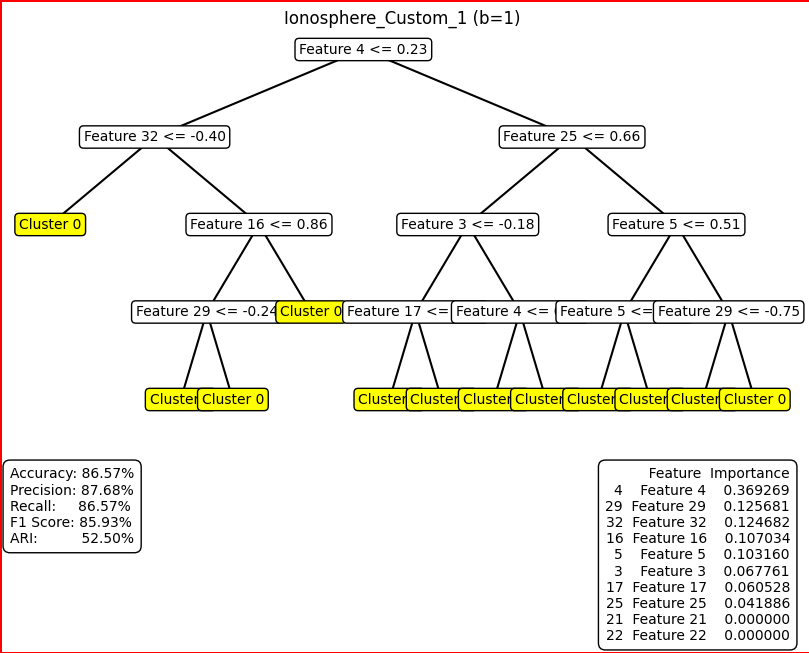

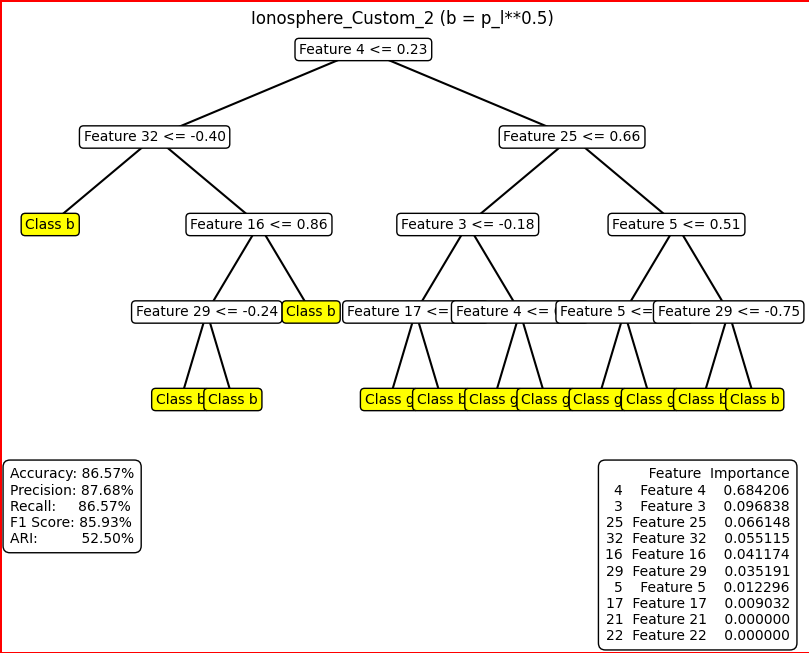

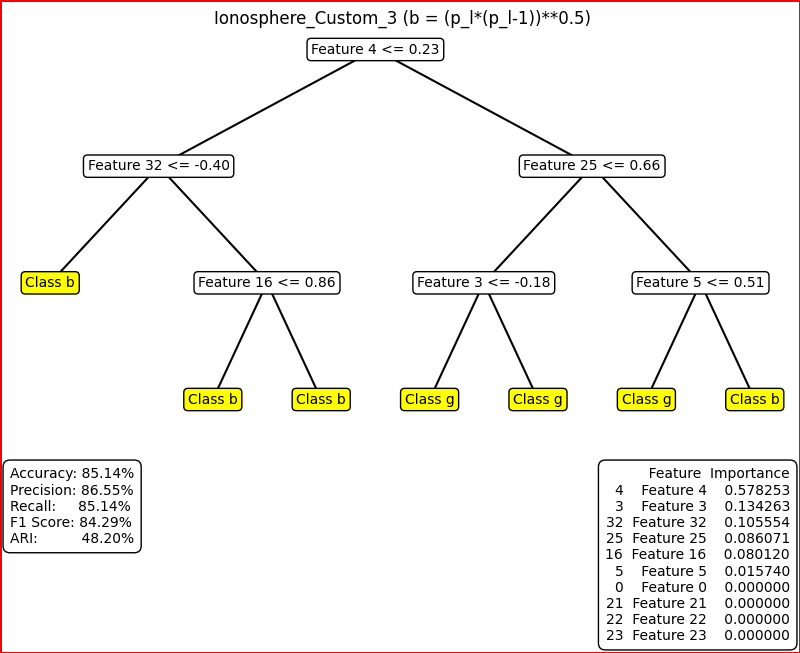

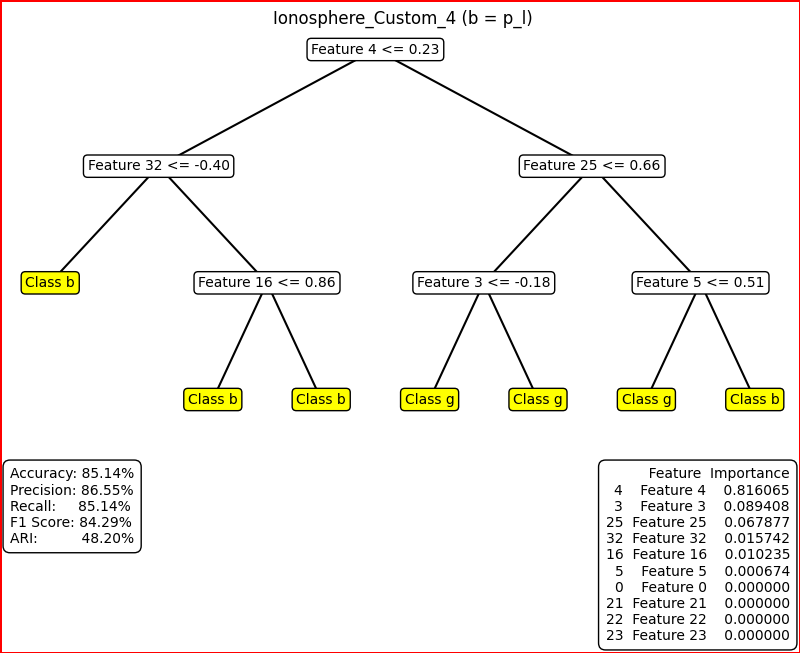

TypeError: Cannot cast array data from dtype('O') to dtype('int64') according to the rule 'safe'

In [207]:
import kagglehub
path = kagglehub.dataset_download("jamieleech/ionosphere")

df = pd.read_csv(f"{path}/ionosphere.csv")
X = df.drop('g', axis=1).to_numpy()
y = df['g'].to_numpy()
num_samples, num_features = X.shape   # вернет num_samples = x, num_features = y, ari

ohe = OneHotEncoder(sparse_output=False)
y_oh = ohe.fit_transform(y.reshape(-1,1)).astype(int)

unique_classes = np.unique(y)
class_names = {cls: f'Cluster {i}' for i, cls in enumerate(sorted(unique_classes))}
feature_names = [f'Feature {i}' for i in range(X.shape[1])]


''' CUSTOM_1 '''
custom_1 = DecisionTree(max_depth=4, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# plot
importances = custom_1.plot_feature_importances(feature_names=feature_names)
custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Ionosphere_Custom_1 (b=1)', feature_names=feature_names, class_names=class_names)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=4, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred_2 = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred_2), precision_score(y, y_pred_2, average='weighted')
recall_2, f1_2 = recall_score(y, y_pred_2, average='weighted'), f1_score(y, y_pred_2, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred_2)

# plot
importances = custom_2.plot_feature_importances(feature_names=feature_names)
custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Ionosphere_Custom_2 (b = p_l**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=3, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
importances = custom_3.plot_feature_importances(feature_names=feature_names)
custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Ionosphere_Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=3, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
importances = custom_4.plot_feature_importances(feature_names=feature_names)
custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Ionosphere_Custom_4 (b = p_l)', feature_names=feature_names, class_names=None)

''' ENTROPY '''
entropy = DecisionTree(max_depth=3, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
importances = entropy.plot_feature_importances(feature_names=feature_names)
entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Ionosphere_Entropy', feature_names=feature_names, class_names=None)

''' GINI '''
gini = DecisionTree(max_depth=3, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
importances = gini.plot_feature_importances(feature_names=feature_names)
gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Ionosphere_Gini', feature_names=feature_names, class_names=None)

ari_max = {'ari_1': ari_1,
           'ari_2': ari_2,
           'ari_3': ari_3,
           'ari_4': ari_4,
           'ari_entropy': ari_entropy,
           'ari_gini': ari_gini}

max_ari_name = max(ari_max, key=ari_max.get)
max_ari_value = ari_max[max_ari_name]

print(f"Maximum ARI: {max_ari_name} = {max_ari_value:.2f}")

In [151]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,true,false,false,true,false,false,true,true,true,true,false,false,4,false,false,true
1,true,false,false,true,false,false,false,true,true,true,false,false,4,true,false,true
2,false,false,true,false,false,true,true,true,true,false,false,true,0,true,false,false
3,true,false,false,true,false,false,true,true,true,true,false,false,4,false,false,true
4,true,false,false,true,false,false,true,true,true,true,false,false,4,true,false,true
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,true,false,false,true,false,false,false,true,true,true,false,false,2,true,false,true
97,true,false,true,false,true,false,false,false,false,true,true,false,6,false,false,false
98,true,false,false,true,false,false,true,true,true,true,false,false,4,true,false,true
99,false,false,true,false,false,false,false,false,false,true,false,false,0,false,false,false


---
## Glass dataset 

In [2]:
import pandas as pd
df = pd.read_csv('glass.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'glass.csv'

In [3]:
df = pd.read_csv('glass.csv')

X = df.drop('Type', axis=1).to_numpy()
y = df['Type'].to_numpy()

num_samples, num_features = X.shape   # вернет num_samples = x, num_features = y, ari

ohe = OneHotEncoder(sparse_output=False)
y_oh = ohe.fit_transform(y.reshape(-1,1)).astype(int)

unique_classes = np.unique(y)
class_names = {cls: f'Cluster {i}' for i, cls in enumerate(sorted(unique_classes))}
feature_names = [f'Feature {i}' for i in range(X.shape[1])]

In [4]:
''' Custom 1 '''
custom_1 = DecisionTree(max_depth=4, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# importances = custom_1.plot_feature_importances(feature_names)
# custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Squeeze-0.75 / Custom_1 (b=1)',feature_names=feature_names,class_names=None)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=4, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred_2 = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred_2), precision_score(y, y_pred_2, average='weighted', zero_division=0)
recall_2, f1_2 = recall_score(y, y_pred_2, average='weighted'), f1_score(y, y_pred_2, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred_2)

# plot
# importances = custom_2.plot_feature_importances(feature_names=feature_names)
# custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Squeeze-0.75 / Custom_2 (b = p_l**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=4, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_3.plot_feature_importances(feature_names=feature_names)
# custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Squeeze-0.75 / Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=4, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_4.plot_feature_importances(feature_names=feature_names)
# custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Squeeze-0.75 / Custom_4 (b = p_l)', feature_names=feature_names, class_names=None)

''' ENTROPY '''
entropy = DecisionTree(max_depth=4, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
# importances = entropy.plot_feature_importances(feature_names=feature_names)
# entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Squeeze-0.75 / Entropy', feature_names=feature_names, class_names=None)

''' GINI '''
gini = DecisionTree(max_depth=4, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
# importances = gini.plot_feature_importances(feature_names=feature_names)
# gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Squeeze-0.75 / Gini', feature_names=feature_names, class_names=None)

ari_max = {'ari_1': ari_1,
           'ari_2': ari_2,
           'ari_3': ari_3,
           'ari_4': ari_4,
           'ari_entropy': ari_entropy,
           'ari_gini': ari_gini}

max_ari_name = max(ari_max, key=ari_max.get)
max_ari_value = ari_max[max_ari_name]

print(f"Maximum ARI: {max_ari_name} = {max_ari_value:.4f}")


results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_entropy, accuracy_gini],
                 [precision_1, precision_2, precision_3, precision_4, precision_entropy, precision_gini],
                 [recall_1, recall_2, recall_3, recall_4, recall_entropy, recall_gini],
                 [f1_1, f1_2, f1_3, f1_4, f1_entropy, f1_gini],
                 [ari_1, ari_2, ari_3, ari_4, ari_entropy, ari_gini]],4)

column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (p_l))^0.5 ','b = p_l ', 'Entropy','Gini']
table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
table

Maximum ARI: ari_entropy = 0.5286


,b = 1,b = p_l ^ 0.5,b = (p_l * (p_l))^0.5,b = p_l,Entropy,Gini
Accuracy,0.6963,0.7009,0.6869,0.7009,0.8037,0.7664
Precision,0.6546,0.6675,0.6652,0.6682,0.8353,0.7749
Recall,0.6963,0.7009,0.6869,0.7009,0.8037,0.7664
F1 score,0.6522,0.6738,0.6341,0.6709,0.8024,0.7656
ARI,0.3899,0.3970,0.3810,0.3993,0.5286,0.4816


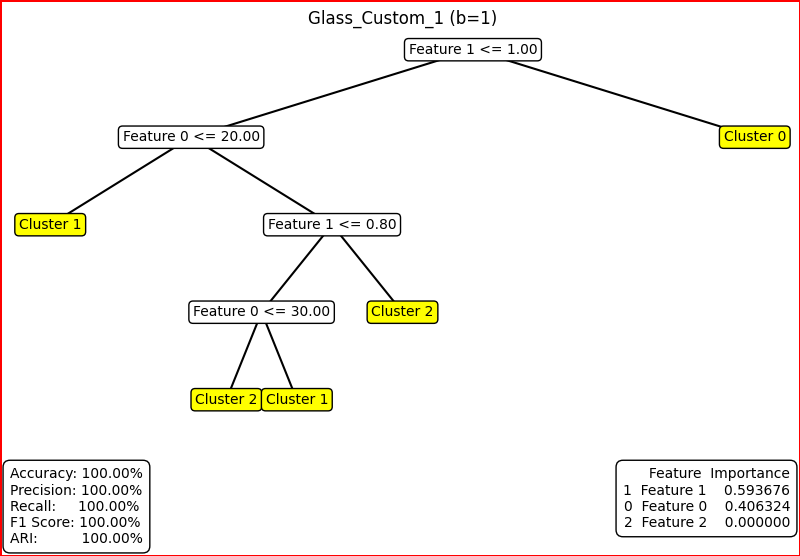

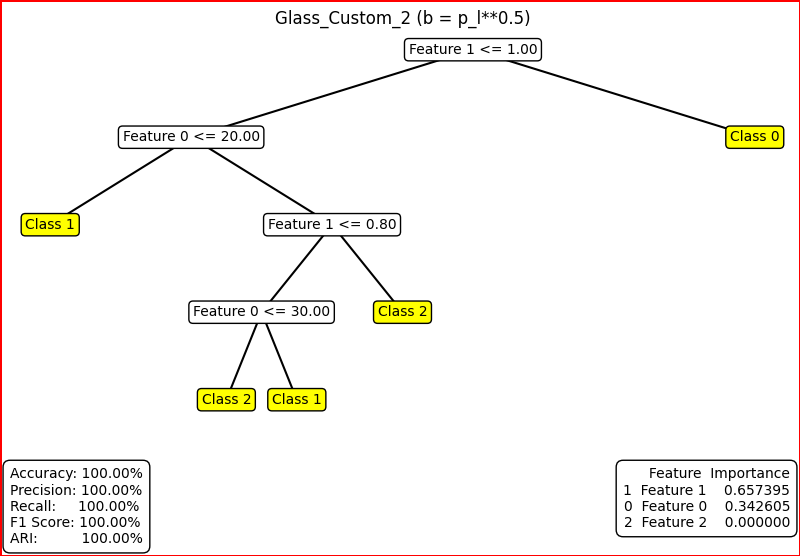

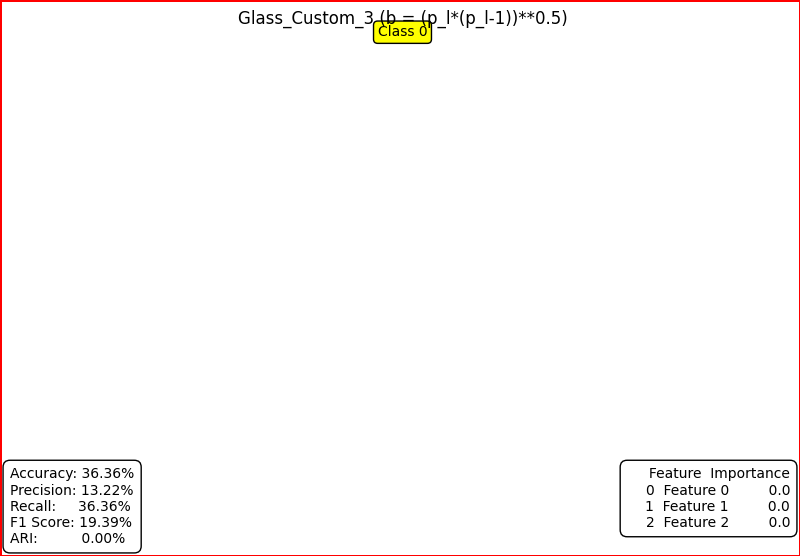

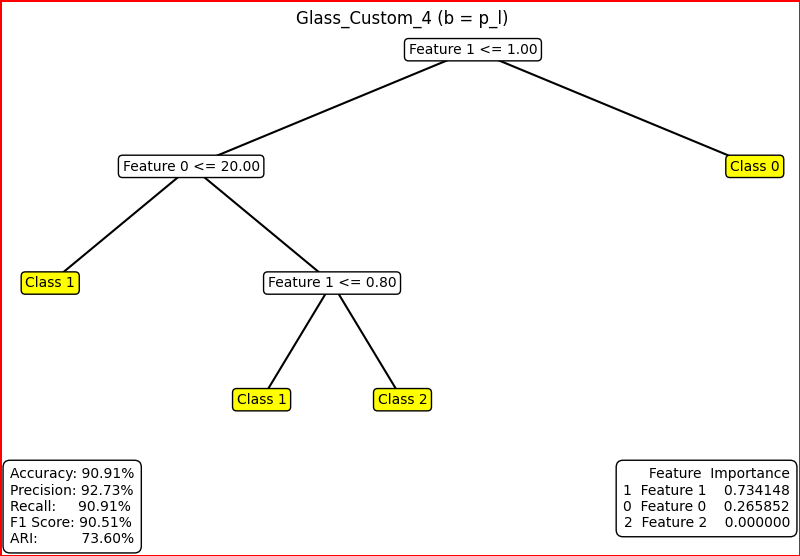

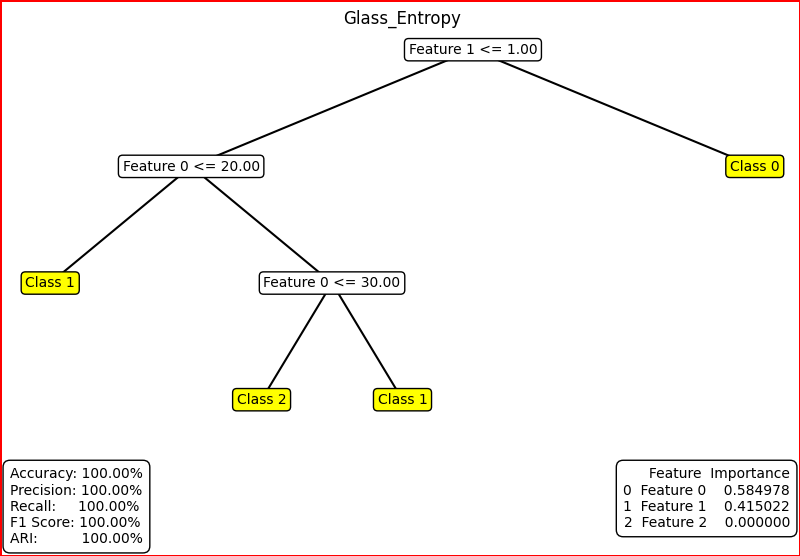

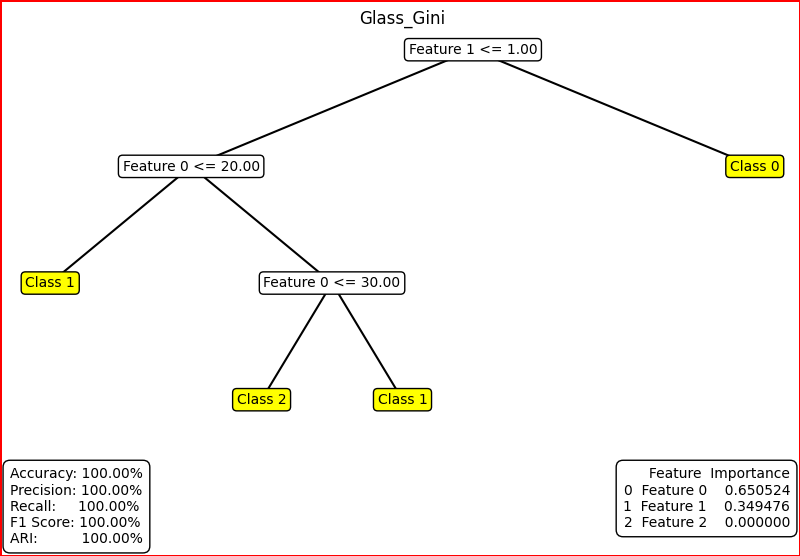

Maximum ARI: ari_1 = 1.00


In [246]:
# 11 объектов, 3 признака
X = np.array([
    [50, 1.1, 180],
    [60, 1.2, 190],
    [20, 1.3, 200],
    [70, 1.4, 210],
    [10, 0.8, 100],
    [60, 0.7, 110],
    [20, 0.6, 120],
    [20, 0.8, 150],
    [30, 0.9, 150],
    [30, 1.0, 160],
    [30, 0.8, 160],
])

# Метки классов
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2])

num_samples, num_features = X.shape   # вернет num_samples = x, num_features = y


ohe = OneHotEncoder(sparse_output=False)
y_oh = ohe.fit_transform(y.reshape(-1,1)).astype(int)


unique_classes = np.unique(y)
class_names = {cls: f'Cluster {i}' for i, cls in enumerate(sorted(unique_classes))}
feature_names = [f'Feature {i}' for i in range(X.shape[1])]

''' CUSTOM_1 '''
custom_1 = DecisionTree(max_depth=4, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# plot
importances = custom_1.plot_feature_importances(feature_names=feature_names)
custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Glass_Custom_1 (b=1)', feature_names=feature_names, class_names=class_names)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=4, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred_2 = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred_2), precision_score(y, y_pred_2, average='weighted')
recall_2, f1_2 = recall_score(y, y_pred_2, average='weighted'), f1_score(y, y_pred_2, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred_2)

# plot
importances = custom_2.plot_feature_importances(feature_names=feature_names)
custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Glass_Custom_2 (b = p_l**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=3, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
importances = custom_3.plot_feature_importances(feature_names=feature_names)
custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Glass_Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=feature_names, class_names=None)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=3, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
importances = custom_4.plot_feature_importances(feature_names=feature_names)
custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Glass_Custom_4 (b = p_l)', feature_names=feature_names, class_names=None)

''' ENTROPY '''
entropy = DecisionTree(max_depth=3, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
importances = entropy.plot_feature_importances(feature_names=feature_names)
entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Glass_Entropy', feature_names=feature_names, class_names=None)

''' GINI '''
gini = DecisionTree(max_depth=3, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
importances = gini.plot_feature_importances(feature_names=feature_names)
gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Glass_Gini', feature_names=feature_names, class_names=None)

ari_max = {'ari_1': ari_1,
           'ari_2': ari_2,
           'ari_3': ari_3,
           'ari_4': ari_4,
           'ari_entropy': ari_entropy,
           'ari_gini': ari_gini}

max_ari_name = max(ari_max, key=ari_max.get)
max_ari_value = ari_max[max_ari_name]

print(f"Maximum ARI: {max_ari_name} = {max_ari_value:.2f}")

In [2]:
df = pd.read_csv('../DATA/Obesity.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
df = pd.read_csv('../DATA/Obesity.csv')
X, y = df.drop('NObeyesdad', axis=1).to_numpy(), df['NObeyesdad'].to_numpy()
num_samples, num_features = X.shape   # вернет num_samples = x, num_features = y, ari
ohe = OneHotEncoder(sparse_output=False)
y_oh = ohe.fit_transform(y.reshape(-1,1)).astype(int)

''' CUSTOM_1 '''
custom_1 = DecisionTree(max_depth=3, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_1 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_1.plot_feature_importances(feature_names=iris.feature_names)
# custom_1.plot_tree(accuracy_1, precision_1, recall_1, f1_1, ari_1, importances, 'Iris_Custom_1 (b=1)', feature_names=iris.feature_names, class_names=iris.target_names)

''' CUSTOM_2 '''
custom_2 = DecisionTree(max_depth=3, criterion='custom_2')
custom_2.fit(X, y, y_oh)
y_pred = custom_2.predict(X)
accuracy_2, precision_2 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_2, f1_2 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_2 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_2.plot_feature_importances(feature_names=iris.feature_names)
# custom_2.plot_tree(accuracy_2, precision_2, recall_2, f1_2, ari_2, importances, 'Iris-Custom_2 (b = p_l**0.5)', feature_names=iris.feature_names, class_names=iris.target_names)

''' CUSTOM_3 '''
custom_3 = DecisionTree(max_depth=3, criterion='custom_3')
custom_3.fit(X, y, y_oh)
y_pred = custom_3.predict(X)
accuracy_3, precision_3 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_3, f1_3 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_3 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_3.plot_feature_importances(feature_names=iris.feature_names)
# custom_3.plot_tree(accuracy_3, precision_3, recall_3, f1_3, ari_3, importances, 'Iris-Custom_3 (b = (p_l*(p_l-1))**0.5)', feature_names=iris.feature_names, class_names=iris.target_names)

''' CUSTOM_4 '''
custom_4 = DecisionTree(max_depth=3, criterion='custom_4')
custom_4.fit(X, y, y_oh)
y_pred = custom_4.predict(X)
accuracy_4, precision_4 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_4, f1_4 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_4 = adjusted_rand_score(y, y_pred)

# plot
# importances = custom_4.plot_feature_importances(feature_names=iris.feature_names)
# custom_4.plot_tree(accuracy_4, precision_4, recall_4, f1_4, ari_4, importances, 'Iris-Custom_4 (b = p_l)', feature_names=iris.feature_names, class_names=iris.target_names)

''' CUSTOM_5 '''
custom_5 = DecisionTree(max_depth=3, criterion='custom_5')
custom_5.fit(X, y, y_oh)
y_pred = custom_5.predict(X)
accuracy_5, precision_5 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_5, f1_5 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_5 = adjusted_rand_score(y, y_pred)


''' CUSTOM_6 '''
custom_6 = DecisionTree(max_depth=3, criterion='custom_6')
custom_6.fit(X, y, y_oh)
y_pred = custom_6.predict(X)
accuracy_6, precision_6 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted', zero_division=0)
recall_6, f1_6 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_6 = adjusted_rand_score(y, y_pred)


''' ENTROPY '''
entropy = DecisionTree(max_depth=3, criterion='entropy')
entropy.fit(X, y, y_oh)
y_pred = entropy.predict(X)
accuracy_entropy, precision_entropy = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_entropy, f1_entropy = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_entropy = adjusted_rand_score(y, y_pred)

# plot
# importances = entropy.plot_feature_importances(feature_names=iris.feature_names)
# entropy.plot_tree(accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, ari_entropy, importances, 'Iris-Entropy', feature_names=iris.feature_names, class_names=iris.target_names)

''' GINI '''
gini = DecisionTree(max_depth=3, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

# plot
# importances = gini.plot_feature_importances(feature_names=iris.feature_names)
# gini.plot_tree(accuracy_gini, precision_gini, recall_gini, f1_gini, ari_gini, importances, 'Iris-Gini', feature_names=iris.feature_names, class_names=iris.target_names)

results = np.round([[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5, accuracy_6, accuracy_entropy, accuracy_gini],
                 [precision_1, precision_2, precision_3, precision_4, precision_5, precision_6, precision_entropy, precision_gini],
                 [recall_1, recall_2, recall_3, recall_4, recall_5, recall_6, recall_entropy, recall_gini],
                 [f1_1, f1_2, f1_3, f1_4, f1_5, f1_6, f1_entropy, f1_gini],
                 [ari_1, ari_2, ari_3, ari_4, ari_5, ari_6, ari_entropy, ari_gini]],10)

column = ['b = 1', 'b = p_l ^ 0.5 ', 'b = (p_l * (1 - p_l))^0.5 ','b = p_l ', 'b = p_l^2', 'b = log(p_l)', 'Entropy','Gini']
table = pd.DataFrame(data=results, columns=column, index=['Accuracy', 'Precision', 'Recall','F1 score','ARI'])
table

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

TypeError: Cannot cast array data from dtype('O') to dtype('int64') according to the rule 'safe'